# Business problem
- In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.
- For many incumbent operators, **retaining high profitable customers** is the number one business goal.
- To reduce customer churn, telecom companies **need to predict** which customers are at **high risk of churn**.


- **Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time. In this project, you will use the **usage-based definition to define churn**.

- The **business objective** is to predict the **churn in the last (i.e. the ninth) month** using the data (features) from the first three months (June, July and August).

There are three phases of customer lifecycle:
1. The **‘good’ phase:** In this phase, the customer is happy with the service and behaves as usual.
2. The **‘action’ phase:** The customer experience starts to soar in this phase, for e.g. he/she gets a compelling offer from a  competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. Also, it is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)
3. The **‘churn’ phase:** In this phase, the customer is said to have churned. You define churn based on this phase.


#  **Model1 -**
1. You can take the following suggestive steps to build the model: Pre-process data (convert columns to appropriate formats,  handle missing values, etc.)
2. Conduct appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).
3. Derive new features.
4. Reduce the number of variables using **PCA**.
5. Train a variety of models, tune model hyperparameters, etc. (**handle class imbalance** using appropriate techniques).
6. Evaluate the models using appropriate evaluation metrics. Note that it is **more important to identify churners than the non-churners** accurately - choose an appropriate evaluation metric which reflects this business goal.
7. Finally, choose a model based on some evaluation metric.

#  **Model2 -**
1. The main objective of **identifying important predictor attributes** which help the business understand indicators of churn. A good choice to identify important variables is a logistic regression model or a model from the tree family. In case of logistic regression, make sure to handle multi-collinearity.

#### --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

- After identifying important predictors, Finally, **recommend strategies to manage customer churn** based on your observations.

In [14]:
# !pip install imblearn
# !pip install xgboost

In [15]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import imblearn
from imblearn.over_sampling import SMOTE


import warnings
warnings.filterwarnings('ignore')

In [16]:
#import data
pd.set_option('display.max_columns',None)

data1 = pd.read_csv('telecom_churn_data.csv')
print("Shape:",data1.shape)
data1.head()

Shape: (99999, 226)


mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [17]:
## High level data exploration

pd.set_option('display.max_rows',None)
pd.set_option('max_colwidth',1000)

columns = data1.columns.to_list()

category_info = pd.DataFrame(data1[columns].nunique().reset_index())
category_info.columns = ["Column","Unique Category"]

category_info["Data Type"] = category_info["Column"].apply(lambda x: data1[x].dtypes)


null_data = data1[columns].isna().sum()/ data1[columns].shape[0]*100
category_info["Percentage of Blank Data"] = np.array(round(null_data,2))


category_info["Unique_category_item"] = category_info["Column"].apply(lambda x: data1[x].unique())

print("Different data types\n-----------------------\n", category_info["Data Type"].value_counts())
category_info


Different data types
-----------------------
 float64    179
int64       35
object      12
Name: Data Type, dtype: int64


Column  Unique Category Data Type  \
0               mobile_number            99999     int64   
1                   circle_id                1     int64   
2              loc_og_t2o_mou                1   float64   
3              std_og_t2o_mou                1   float64   
4              loc_ic_t2o_mou                1   float64   
5        last_date_of_month_6                1    object   
6        last_date_of_month_7                1    object   
7        last_date_of_month_8                1    object   
8        last_date_of_month_9                1    object   
9                      arpu_6            85681   float64   
10                     arpu_7            85308   float64   
11                     arpu_8            83615   float64   
12                     arpu_9            79937   float64   
13                onnet_mou_6            24313   float64   
14                onnet_mou_7            24336   float64   
15                onnet_mou_8            24089   float64   
16                onnet_mou_9            23565   float64   
17               offnet_mou_6            31140   float64   
18               offnet_mou_7            31023   float64   
19               offnet_mou_8            30908   float64   
20               offnet_mou_9            30077   float64   
21              roam_ic_mou_6             6512   float64   
22              roam_ic_mou_7             5230   float64   
23              roam_ic_mou_8             5315   float64   
24              roam_ic_mou_9             4827   float64   
25              roam_og_mou_6             8038   float64   
26              roam_og_mou_7             6639   float64   
27              roam_og_mou_8             6504   float64   
28              roam_og_mou_9             5882   float64   
29           loc_og_t2t_mou_6            13539   float64   
30           loc_og_t2t_mou_7            13411   float64   
31           loc_og_t2t_mou_8            13336   float64   
32           loc_og_t2t_mou_9            12949   float64   
33           loc_og_t2m_mou_6            20905   float64   
34           loc_og_t2m_mou_7            20637   float64   
35           loc_og_t2m_mou_8            20544   float64   
36           loc_og_t2m_mou_9            20141   float64   
37           loc_og_t2f_mou_6             3860   float64   
38           loc_og_t2f_mou_7             3863   float64   
39           loc_og_t2f_mou_8             3807   float64   
40           loc_og_t2f_mou_9             3758   float64   
41           loc_og_t2c_mou_6             2235   float64   
42           loc_og_t2c_mou_7             2426   float64   
43           loc_og_t2c_mou_8             2516   float64   
44           loc_og_t2c_mou_9             2332   float64   
45               loc_og_mou_6            26372   float64   
46               loc_og_mou_7            26091   float64   
47               loc_og_mou_8            25990   float64   
48               loc_og_mou_9            25376   float64   
49           std_og_t2t_mou_6            18244   float64   
50           std_og_t2t_mou_7            18567   float64   
51           std_og_t2t_mou_8            18291   float64   
52           std_og_t2t_mou_9            17934   float64   
53           std_og_t2m_mou_6            19734   float64   
54           std_og_t2m_mou_7            20018   float64   
55           std_og_t2m_mou_8            19786   float64   
56           std_og_t2m_mou_9            19052   float64   
57           std_og_t2f_mou_6             2450   float64   
58           std_og_t2f_mou_7             2391   float64   
59           std_og_t2f_mou_8             2333   float64   
60           std_og_t2f_mou_9             2295   float64   
61           std_og_t2c_mou_6                1   float64   
62           std_og_t2c_mou_7                1   float64   
63           std_og_t2c_mou_8                1   float64   
64           std_og_t2c_mou_9                1   float64   
65               std_og_mou_6            27502   float64   
66 

### Observations:
- We can see there is **no duplicate phone number** (Unique category = number of rows) 
- few Variables with one category. We can remove them. 
- We can see there are many variables Nan values. 

In [18]:
## Lets rename the last few variable from month name to number to make them uniform as other
data1.rename(columns = {'jun_vbc_3g':'vbc_3g_6',
                        'jul_vbc_3g':'vbc_3g_7',
                        'aug_vbc_3g':'vbc_3g_8',
                        'sep_vbc_3g':'vbc_3g_9'}, inplace = True)
data1.columns.to_list()[-4:]

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6', 'vbc_3g_9']


## 3. fixing null values

In [19]:
category_info[["Column","Percentage of Blank Data"]].sort_values(by='Percentage of Blank Data',ascending= False)

Column  Percentage of Blank Data
189                 arpu_3g_6                     74.85
197          night_pck_user_6                     74.85
161         total_rech_data_6                     74.85
193                 arpu_2g_6                     74.85
165           max_rech_data_6                     74.85
217                 fb_user_6                     74.85
177        av_rech_amt_data_6                     74.85
157  date_of_last_rech_data_6                     74.85
169           count_rech_2g_6                     74.85
173           count_rech_3g_6                     74.85
158  date_of_last_rech_data_7                     74.43
162         total_rech_data_7                     74.43
218                 fb_user_7                     74.43
166           max_rech_data_7                     74.43
198          night_pck_user_7                     74.43
170           count_rech_2g_7                     74.43
178        av_rech_amt_data_7                     74.43
194                 arpu_2g_7                     74.43
174           count_rech_3g_7                     74.43
190                 arpu_3g_7                     74.43
164         total_rech_data_9                     74.08
176           count_rech_3g_9                     74.08
220                 fb_user_9                     74.08
168           max_rech_data_9                     74.08
192                 arpu_3g_9                     74.08
160  date_of_last_rech_data_9                     74.08
200          night_pck_user_9                     74.08
196                 arpu_2g_9                     74.08
172           count_rech_2g_9                     74.08
180        av_rech_amt_data_9                     74.08
163         total_rech_data_8                     73.66
191                 arpu_3g_8                     73.66
219                 fb_user_8                     73.66
199          night_pck_user_8                     73.66
179        av_rech_amt_data_8                     73.66
167           max_rech_data_8                     73.66
175           count_rech_3g_8                     73.66
195                 arpu_2g_8                     73.66
171           count_rech_2g_8                     73.66
159  date_of_last_rech_data_8                     73.66
136               ic_others_9                      7.75
68               std_og_mou_9                      7.75
64           std_og_t2c_mou_9                      7.75
132              isd_ic_mou_9                      7.75
120              std_ic_mou_9                      7.75
72               isd_og_mou_9                      7.75
76               spl_og_mou_9                      7.75
128              spl_ic_mou_9                      7.75
80                og_others_9                      7.75
88           loc_ic_t2t_mou_9                      7.75
116          std_ic_t2o_mou_9                      7.75
92           loc_ic_t2m_mou_9                      7.75
112          std_ic_t2f_mou_9                      7.75
96           loc_ic_t2f_mou_9                      7.75
100              loc_ic_mou_9                      7.75
108          std_ic_t2m_mou_9                      7.75
60           std_og_t2f_mou_9                      7.75
52           std_og_t2t_mou_9                      7.75
104          std_ic_t2t_mou_9                      7.75
48               loc_og_mou_9                      7.75
28              roam_og_mou_9                      7.75
36           loc_og_t2m_mou_9                      7.75
40           loc_og_t2f_mou_9                      7.75
24              roam_ic_mou_9                      7.75
20               offnet_mou_9                      7.75
44           loc_og_t2c_mou_9                      7.75
32           loc_og_t2t_mou_9                      7.75
56           std_og_t2m_mou_9                      7.75
16                onnet_mou_9                      7.75
15                onnet_mou_8                      5.38
103          std_ic_t2t_mou_8                  

In [20]:
## We can see there are some relationships in variables for blank data. mostly are DATA related variables for high blank and  
## let’s check if recharge done, are those variables STILL blank.

month_6_columns = ['arpu_3g_6', 'night_pck_user_6', 'total_rech_data_6', 'arpu_2g_6', 'max_rech_data_6', 'fb_user_6', 'av_rech_amt_data_6', 'date_of_last_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6']
month_7_columns = ['date_of_last_rech_data_7', 'total_rech_data_7', 'fb_user_7', 'max_rech_data_7', 'night_pck_user_7', 'count_rech_2g_7', 'av_rech_amt_data_7', 'arpu_2g_7', 'count_rech_3g_7', 'arpu_3g_7']
month_9_columns = ['total_rech_data_9', 'count_rech_3g_9', 'fb_user_9', 'max_rech_data_9', 'arpu_3g_9', 'date_of_last_rech_data_9', 'night_pck_user_9', 'arpu_2g_9', 'count_rech_2g_9', 'av_rech_amt_data_9']
month_8_columns = ['total_rech_data_8', 'arpu_3g_8', 'fb_user_8', 'night_pck_user_8', 'av_rech_amt_data_8', 'max_rech_data_8', 'count_rech_3g_8', 'arpu_2g_8', 'count_rech_2g_8', 'date_of_last_rech_data_8']

print("Data related columns\n-----------------------------")
print("month 6 DATA variables with blank data (74.85%), blank even data recharged: ", sum(data1[~data1.total_rech_data_6.isna()][month_6_columns].isna().sum()))
print("month 7 DATA variables with blank data (74.43%), blank even data recharged: ", sum(data1[~data1.total_rech_data_7.isna()][month_7_columns].isna().sum()))
print("month 9 DATA variables with blank data (74.08%), blank even data recharged: ", sum(data1[~data1.total_rech_data_9.isna()][month_9_columns].isna().sum()))
print("month 8 DATA variables with blank data (73.66%), blank even data recharged: ", sum(data1[~data1.total_rech_data_8.isna()][month_8_columns].isna().sum()))

print()
print("Calls related columns\n-----------------------------")
column_call_missing_9 = ['ic_others_9', 'std_og_mou_9', 'std_og_t2c_mou_9', 'isd_ic_mou_9', 'std_ic_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'spl_ic_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'std_ic_t2o_mou_9', 'loc_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2t_mou_9', 'std_ic_t2t_mou_9', 'loc_og_mou_9', 'roam_og_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'roam_ic_mou_9', 'offnet_mou_9', 'loc_og_t2c_mou_9', 'loc_og_t2t_mou_9', 'std_og_t2m_mou_9', 'onnet_mou_9']
column_call_missing_8 = ['onnet_mou_8', 'std_ic_t2t_mou_8', 'std_ic_mou_8', 'loc_ic_t2t_mou_8', 'roam_og_mou_8', 'std_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'roam_ic_mou_8', 'std_ic_t2o_mou_8', 'loc_og_t2t_mou_8', 'loc_ic_t2f_mou_8', 'offnet_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_t2m_mou_8', 'isd_og_mou_8', 'ic_others_8', 'og_others_8', 'spl_ic_mou_8', 'loc_og_t2f_mou_8', 'std_og_t2m_mou_8', 'spl_og_mou_8', 'std_og_t2c_mou_8', 'isd_ic_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2f_mou_8', 'std_og_t2t_mou_8', 'loc_og_mou_8', 'std_og_mou_8']
column_call_missing_6 = ['std_ic_t2f_mou_6', 'ic_others_6', 'isd_ic_mou_6', 'std_ic_t2m_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 'std_ic_t2o_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_t2t_mou_6', 'std_og_t2c_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_og_t2m_mou_6', 'isd_og_mou_6', 'std_og_t2t_mou_6', 'spl_og_mou_6', 'loc_og_mou_6', 'og_others_6', 'loc_og_t2c_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2t_mou_6', 'roam_og_mou_6', 'std_ic_t2t_mou_6', 'onnet_mou_6', 'loc_ic_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'loc_ic_t2m_mou_6']
column_call_missing_7 = ['loc_og_t2c_mou_7', 'roam_ic_mou_7', 'loc_og_mou_7', 'loc_og_t2t_mou_7', 'offnet_mou_7', 'loc_og_t2f_mou_7', 'std_og_t2t_mou_7', 'std_ic_t2t_mou_7', 'onnet_mou_7', 'std_og_t2m_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2f_mou_7', 'roam_og_mou_7', 'std_og_t2c_mou_7', 'std_ic_t2m_mou_7', 'isd_og_mou_7', 'ic_others_7', 'loc_ic_t2f_mou_7', 'loc_ic_t2m_mou_7', 'std_ic_mou_7', 'loc_ic_t2t_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'spl_ic_mou_7', 'og_others_7', 'spl_og_mou_7', 'isd_ic_mou_7', 'std_ic_t2o_mou_7', 'std_og_mou_7']

mis_9 = data1.loc[data1.total_rech_amt_9>0,column_call_missing_9].isna().sum().values.max()
nomis_9 =  data1.loc[data1.total_rech_amt_9<0,column_call_missing_9].isna().sum().values.max()

mis_8 = data1.loc[data1.total_rech_amt_8>0,column_call_missing_8].isna().sum().values.max()
nomis_8 =  data1.loc[data1.total_rech_amt_8<0,column_call_missing_8].isna().sum().values.max()

mis_7 = data1.loc[data1.total_rech_amt_7>0,column_call_missing_7].isna().sum().values.max()
nomis_7 =  data1.loc[data1.total_rech_amt_7<0,column_call_missing_7].isna().sum().values.max()

mis_6 = data1.loc[data1.total_rech_amt_6>0,column_call_missing_6].isna().sum().values.max()
nomis_6 =  data1.loc[data1.total_rech_amt_6<0,column_call_missing_6].isna().sum().values.max()


print("Number of rows with month 9 blank calling variables if recharge done", mis_9)
print("Number of rows with month 9 blank calling variables if recharge NOT done", nomis_9)

print("Number of rows with month 8 blank calling variables if recharge done", mis_8)
print("Number of rows with month 8 blank calling variables if recharge NOT done", nomis_8)

print("Number of rows with month 7 blank calling variables if recharge done", mis_7)
print("Number of rows with month 7 blank calling variables if recharge NOT done", nomis_7)

print("Number of rows with month 6 blank calling variables if recharge done", mis_6)
print("Number of rows with month 6 blank calling variables if recharge NOT done", nomis_6)




Data related columns
-----------------------------
month 6 DATA variables with blank data (74.85%), blank even data recharged:  0
month 7 DATA variables with blank data (74.43%), blank even data recharged:  0
month 9 DATA variables with blank data (74.08%), blank even data recharged:  0
month 8 DATA variables with blank data (73.66%), blank even data recharged:  0

Calls related columns
-----------------------------
Number of rows with month 9 blank calling variables if recharge done 550
Number of rows with month 9 blank calling variables if recharge NOT done 0.0
Number of rows with month 8 blank calling variables if recharge done 711
Number of rows with month 8 blank calling variables if recharge NOT done 0.0
Number of rows with month 7 blank calling variables if recharge done 736
Number of rows with month 7 blank calling variables if recharge NOT done 0.0
Number of rows with month 6 blank calling variables if recharge done 921
Number of rows with month 6 blank calling variables if re

### Observations:
- We could see if recharge not done for DATA, there is no usage of DATA
- some customer did not use calling facilities, even they recharged. 

In [21]:
## after investigating the data, we can see the DATA variables are either blank or marked 0 in actual data. so, whatever 
## variables are blank, we will fill it by 0


data_columns_to_fill = ['arpu_3g_6', 'night_pck_user_6', 'total_rech_data_6', 'arpu_2g_6', 'max_rech_data_6', 'fb_user_6', 
                        'av_rech_amt_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 
                        'total_rech_data_7', 'fb_user_7', 'max_rech_data_7', 'night_pck_user_7', 'count_rech_2g_7', 'av_rech_amt_data_7', 
                        'arpu_2g_7', 'count_rech_3g_7', 'arpu_3g_7', 
                        'total_rech_data_9', 'count_rech_3g_9', 'fb_user_9', 'max_rech_data_9', 'arpu_3g_9', 'night_pck_user_9', 'arpu_2g_9',
                        'count_rech_2g_9', 'av_rech_amt_data_9', 
                        'total_rech_data_8', 'arpu_3g_8', 'fb_user_8', 'night_pck_user_8', 'av_rech_amt_data_8', 'max_rech_data_8', 
                        'count_rech_3g_8', 'arpu_2g_8', 'count_rech_2g_8']

## same for calling variables. Also we can see blank even calling recharge done. So they did not use the option. We will
## fill them with 0
calling_columns_to_fill = ['ic_others_9', 'std_og_mou_9', 'std_og_t2c_mou_9', 'isd_ic_mou_9', 'std_ic_mou_9', 'isd_og_mou_9', 
                           'spl_og_mou_9', 'spl_ic_mou_9', 'og_others_9', 'loc_ic_t2t_mou_9', 'std_ic_t2o_mou_9', 'loc_ic_t2m_mou_9',
                           'std_ic_t2f_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2m_mou_9', 'std_og_t2f_mou_9', 
                           'std_og_t2t_mou_9', 'std_ic_t2t_mou_9', 'loc_og_mou_9', 'roam_og_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 
                           'roam_ic_mou_9', 'offnet_mou_9', 'loc_og_t2c_mou_9', 'loc_og_t2t_mou_9', 'std_og_t2m_mou_9', 
                           'onnet_mou_9', 'onnet_mou_8', 'std_ic_t2t_mou_8', 'std_ic_mou_8', 'loc_ic_t2t_mou_8', 'roam_og_mou_8', 
                           'std_ic_t2m_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'roam_ic_mou_8', 'std_ic_t2o_mou_8', 'loc_og_t2t_mou_8', 
                           'loc_ic_t2f_mou_8', 'offnet_mou_8', 'loc_ic_t2m_mou_8', 'loc_og_t2m_mou_8', 'isd_og_mou_8', 'ic_others_8', 
                           'og_others_8', 'spl_ic_mou_8', 'loc_og_t2f_mou_8', 'std_og_t2m_mou_8', 'spl_og_mou_8', 'std_og_t2c_mou_8', 
                           'isd_ic_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2f_mou_8', 'std_og_t2t_mou_8', 'loc_og_mou_8', 'std_og_mou_8', 
                           'std_ic_t2f_mou_6', 'ic_others_6', 'isd_ic_mou_6', 'std_ic_t2m_mou_6', 'std_ic_mou_6', 'spl_ic_mou_6', 
                           'std_ic_t2o_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_t2t_mou_6', 'std_og_t2c_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 
                           'std_og_t2m_mou_6', 'isd_og_mou_6', 'std_og_t2t_mou_6', 'spl_og_mou_6', 'loc_og_mou_6', 'og_others_6', 
                           'loc_og_t2c_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2t_mou_6', 'roam_og_mou_6', 
                           'std_ic_t2t_mou_6', 'onnet_mou_6', 'loc_ic_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'loc_ic_t2m_mou_6', 
                           'loc_og_t2c_mou_7', 'roam_ic_mou_7', 'loc_og_mou_7', 'loc_og_t2t_mou_7', 'offnet_mou_7', 'loc_og_t2f_mou_7', 
                           'std_og_t2t_mou_7', 'std_ic_t2t_mou_7', 'onnet_mou_7', 'std_og_t2m_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2f_mou_7', 
                           'roam_og_mou_7', 'std_og_t2c_mou_7', 'std_ic_t2m_mou_7', 'isd_og_mou_7', 'ic_others_7', 'loc_ic_t2f_mou_7', 
                           'loc_ic_t2m_mou_7', 'std_ic_mou_7', 'loc_ic_t2t_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7', 'spl_ic_mou_7', 
                           'og_others_7', 'spl_og_mou_7', 'isd_ic_mou_7', 'std_ic_t2o_mou_7', 'std_og_mou_7']

#for now lets fill with 0 and will deal with date later as required.
Date_column_to_fill = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_9','date_of_last_rech_data_8',
                       'date_of_last_rech_9','date_of_last_rech_8','date_of_last_rech_7','date_of_last_rech_6']


data2 = data1.copy()
for col in data_columns_to_fill:
   data2[col].fillna(0, inplace=True)
for col in calling_columns_to_fill:
   data2[col].fillna(0, inplace=True)
for col in Date_column_to_fill:
   data2[col].fillna(0, inplace=True)


In [22]:
## let's remove the variables with one unique category, without data variation it will not help in data analysis

category_info2 = category_info[category_info['Unique Category'] == 1]
single_category_column = category_info2.Column.to_list()

print("single_category_column : ",single_category_column)

data2.drop(single_category_column,axis=True, inplace=True)

single_category_column :  ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


In [23]:
## Lets check if any blank data left
print("Number of records with blank data: ", sum(data2.isna().sum()))

Number of records with blank data:  0


In [24]:
print("Shape of data : ", data2.shape)
data2.head()

Shape of data :  (99999, 210)


mobile_number   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0     7000842753  197.385  214.816  213.803   21.100         0.00   
1     7001865778   34.047  355.074  268.321   86.285        24.11   
2     7001625959  167.690  189.058  210.226  290.714        11.54   
3     7001204172  221.338  251.102  508.054  389.500        99.91   
4     7000142493  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0         0.00         0.00         0.00          0.00          0.00   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00          0.00            0.0           0.00           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0           0.00            0.0           0.00           0.00           0.00   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0              0.00              0.00              0.00              0.00   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0              0.00              0.00              0.00              0.00   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0              0.00              0.00              0.00              0.00   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              4.91              2.06   
4              0.00              0.00              0.00              1.93   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  \
0               0.0              0.00              0.00              0.00   
1               0.0              2.91              0.00              0.00   
2               0.0            135.54             45.76              0.48   
3               0.0              0.00              0.00              0.00   
4               0.0              0.00              0.00              0.00   

   loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  loc_og_mou_9  std_og_t2t_mou_6  \
0          0.00          0.00          0.00          0.00              0.00   
1         35.39        150.51        299.54         72.11              0.23   
2         60.66         67.41         67.66         64.81              4.34   
3        183.03        118.68        

## 4. Data preparation - part I
 - 1.**high-value customers**: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the **first two months (the good phase)**.


In [26]:
all_columns = data2.columns
recharge_columns = []

for col in all_columns:
    if col.find("_rech") > 0:
        recharge_columns.append(col)
print("Recharge related columns:\n------------------------------------\n",recharge_columns)        

Recharge related columns:
------------------------------------
 ['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']


In [27]:
## for calling we have variable for total recharge. However, for DATA we have average amount and number of recharge. 
## let's multiply to get total data recharge.

data2["total_rech_data_comb_6"] = data2.total_rech_data_6 * data2.av_rech_amt_data_6
data2["total_rech_data_comb_7"] = data2.total_rech_data_7 * data2.av_rech_amt_data_7
data2["total_rech_data_comb_8"] = data2.total_rech_data_8 * data2.av_rech_amt_data_8
data2["total_rech_data_comb_9"] = data2.total_rech_data_9 * data2.av_rech_amt_data_9

## Addition of DATA and calling recharge amount
data2["total_rech_6"] = data2.total_rech_data_comb_6 + data2.total_rech_amt_6
data2["total_rech_7"] = data2.total_rech_data_comb_7 + data2.total_rech_amt_7
data2["total_rech_8"] = data2.total_rech_data_comb_8 + data2.total_rech_amt_8
data2["total_rech_9"] = data2.total_rech_data_comb_9 + data2.total_rech_amt_9

## Finding average amount for first 2 months (good phase)
data2["avg_total_amount_6_7"] = (data2["total_rech_6"] + data2["total_rech_7"])

## finding 70th percentile
avg_total_amount_70_per = data2["avg_total_amount_6_7"].quantile(0.7)
data_HighValue = data2[data2["avg_total_amount_6_7"] >= avg_total_amount_70_per]

print("70 percentile average amount: ", avg_total_amount_70_per)
print("High Value customer data shape: ",data_HighValue.shape)


70 percentile average amount:  956.0
High Value customer data shape:  (30001, 219)


## 4. Data preparation - part II
- 2.**Labelling target variable and tagging churn** : Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:
 - total_ic_mou_9
 - total_og_mou_9
 - vol_2g_mb_9
 - vol_3g_mb_9
- After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [28]:
## any calls (either incoming or outgoing)
data_HighValue["Calls_9"] = data_HighValue.total_ic_mou_9 + data_HighValue.total_og_mou_9

## have not used mobile internet even once
data_HighValue["data_9"] = data_HighValue.vol_2g_mb_9 + data_HighValue.vol_3g_mb_9

## have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase
data_HighValue["Churn"] = np.where(((data_HighValue.Calls_9 == 0) & (data_HighValue.data_9 == 0)), 1 , 0)


data_HighValue.drop(["Calls_9", "data_9"], axis= 1, inplace= True)

print("Churn distribution\n---------------------\n", round(data_HighValue.Churn.value_counts(normalize=True)*100,2))

Churn distribution
---------------------
 0    91.86
1     8.14
Name: Churn, dtype: float64


### So we have derived 91.86% as non-churn customer and 8.14% as churn customer.

In [29]:
## remove variables for month 9
column_9 = []
all_columns = data_HighValue.columns

for col in all_columns:
    if col.find("_9") > 0:
        column_9.append(col)

        
data_HighValue.drop(column_9, axis=1, inplace=True)        
print("removed columns:", column_9)

removed columns: ['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9', 'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9', 'total_rech_data_comb_9', 'total_rech_9']


In [30]:
print("shape of data after data _9 variables: ",data_HighValue.shape)
data_HighValue.head()

shape of data after data _9 variables:  (30001, 166)


mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0      7000842753   197.385   214.816   213.803         0.00         0.00   
7      7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8      7001524846   378.721   492.223   137.362       413.69       351.03   
21     7002124215   514.453   597.753   637.760       102.41       132.11   
23     7000887461    74.350   193.897   366.966        48.96        50.66   

    onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0          0.00          0.00          0.00          0.00           0.00   
7         52.29        453.43        567.16        325.91          16.23   
8         35.08         94.66         80.63        136.48           0.00   
21        85.14        757.93        896.68        983.39           0.00   
23        33.58         85.41         89.36        205.89           0.00   

    roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0            0.00           0.00           0.00           0.00           0.00   
7           33.49          31.64          23.74          12.59          38.06   
8            0.00           0.00           0.00           0.00           0.00   
21           0.00           0.00           0.00           0.00           0.00   
23           0.00           0.00           0.00           0.00           0.00   

    loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0               0.00              0.00              0.00              0.00   
7              51.39             31.38             40.28            308.63   
8             297.13            217.59             12.49             80.96   
21              4.48              6.16             23.34             91.81   
23             48.96             50.66             33.58             82.94   

    loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0               0.00              0.00              0.00              0.00   
7             447.38            162.28             62.13             55.14   
8              70.58             50.54              0.00              0.00   
21             87.93            104.81              0.75              0.00   
23             83.01            148.56              0.00              0.00   

    loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
0               0.00               0.0               0.0              0.00   
7              53.23               0.0               0.0              0.00   
8               0.00               0.0               0.0              7.15   
21              1.58               0.0               0.0              0.00   
23              0.00               0.0               0.0             17.71   

    loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  \
0           0.00          0.00          0.00              0.00   
7         422.16        533.91        255.79              4.30   
8         378.09        288.18         63.04            116.56   
21         97.04         94.09        129.74             97.93   
23        131.91        133.68        182.14              0.00   

    std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  \
0               0.00              0.00              0.00              0.00   
7              23.29             12.01             49.89             31.76   
8             133.43             22.58             13.69             10.04   
21            125.94             61.79            665.36            808.74   
23              0.00              0.00              2.36              6.35   

    std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0               0.00              0.00              0.00              0.00   
7              49.14              6.66             20.08             16.68   
8              75.69              0.00              0.00              0.00   
21          

In [31]:
## Stats for all variable for Churn data.
data_HighValue[data_HighValue.Churn==1].describe()

mobile_number        arpu_6        arpu_7       arpu_8  onnet_mou_6  \
count   2.441000e+03   2441.000000   2441.000000  2441.000000  2441.000000   
mean    7.001136e+09    663.158246    540.165968   237.200793   369.058173   
std     7.276409e+05    584.538210    540.367084   386.441008   608.456336   
min     7.000000e+09   -209.465000   -158.963000   -37.887000     0.000000   
25%     7.000483e+09    336.895000    221.160000     0.000000    12.380000   
50%     7.001071e+09    556.661000    462.400000    78.357000   113.010000   
75%     7.001808e+09    834.236000    707.563000   335.962000   457.960000   
max     7.002410e+09  11505.508000  13224.119000  5228.826000  7011.110000   

       onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  2441.000000  2441.000000   2441.000000   2441.000000   2441.000000   
mean    292.408353   113.226846    471.331073    381.416104    138.248751   
std     541.015921   339.977782    655.047666    596.465196    317.998389   
min       0.000000     0.000000      0.000000      0.000000      0.000000   
25%       5.390000     0.000000     58.240000     30.240000      0.000000   
50%      71.430000     2.360000    239.140000    162.190000     10.280000   
75%     326.930000    63.510000    607.210000    475.530000    130.080000   
max    8157.780000  5193.660000   8362.360000   6339.340000   4167.740000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count    2441.000000    2441.000000    2441.000000    2441.000000   
mean       28.962614      29.964297      27.236800      51.799316   
std       134.257387     142.679770     133.404714     198.376036   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.300000       4.630000       6.430000       0.940000   
max      2307.910000    3813.290000    2898.340000    3161.790000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count    2441.000000    2441.000000       2441.000000       2441.000000   
mean       50.134482      43.638824         59.736981         44.692946   
std       168.435416     177.782354        190.975196        147.513552   
min         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          0.850000          0.000000   
50%         0.000000       0.000000         12.380000          8.280000   
75%        18.730000      17.760000         48.360000         35.430000   
max      2812.040000    5337.040000       3487.760000       2758.760000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  \
count        2441.00000       2441.000000       2441.000000       2441.000000   
mean           16.06721        112.700107         88.631540         32.047431   
std            71.54322        216.376464        194.065358        107.541302   
min             0.00000          0.000000          0.000000          0.000000   
25%             0.00000          6.690000          1.310000          0.000000   
50%             0.00000         39.510000         27.880000          0.000000   
75%             6.00000        127.230000         93.510000         18.530000   
max          1342.81000       3285.360000       3594.760000       3068.790000   

       loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  \
count       2441.000000       2441.000000       2441.000000       2441.000000   
mean           3.613421          2.992581          1.301794          1.572343   
std           31.542191         26.312446          7.637488          6.748645   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            

## 5. EDA, feature engineering

In [32]:
## Function to get overall column level insight
def full_view(data1):
    columns = data1.columns.to_list()

    category_info = pd.DataFrame(data1[columns].nunique().reset_index())
    category_info.columns = ["Column","Unique Category"]

    category_info["Data Type"] = category_info["Column"].apply(lambda x: data1[x].dtypes)


    null_data = data1[columns].isna().sum()/ data1[columns].shape[0]*100
    category_info["Percentage of Blank Data"] = np.array(round(null_data,2))


    category_info["Unique_category_item"] = category_info["Column"].apply(lambda x: data1[x].unique())

    print("Different data types\n-----------------------\n", category_info["Data Type"].value_counts())
    return category_info

category_info = full_view(data_HighValue)
category_info

Different data types
-----------------------
 float64    133
int64       26
object       6
int32        1
Name: Data Type, dtype: int64


Column  Unique Category Data Type  \
0               mobile_number            30001     int64   
1                      arpu_6            29072   float64   
2                      arpu_7            29084   float64   
3                      arpu_8            28073   float64   
4                 onnet_mou_6            16890   float64   
5                 onnet_mou_7            16987   float64   
6                 onnet_mou_8            15872   float64   
7                offnet_mou_6            21220   float64   
8                offnet_mou_7            21263   float64   
9                offnet_mou_8            20163   float64   
10              roam_ic_mou_6             4048   float64   
11              roam_ic_mou_7             3385   float64   
12              roam_ic_mou_8             3433   float64   
13              roam_og_mou_6             4744   float64   
14              roam_og_mou_7             3994   float64   
15              roam_og_mou_8             4001   float64   
16           loc_og_t2t_mou_6            10420   float64   
17           loc_og_t2t_mou_7            10394   float64   
18           loc_og_t2t_mou_8            10063   float64   
19           loc_og_t2m_mou_6            15625   float64   
20           loc_og_t2m_mou_7            15674   float64   
21           loc_og_t2m_mou_8            15130   float64   
22           loc_og_t2f_mou_6             3090   float64   
23           loc_og_t2f_mou_7             3100   float64   
24           loc_og_t2f_mou_8             2989   float64   
25           loc_og_t2c_mou_6             1682   float64   
26           loc_og_t2c_mou_7             1764   float64   
27           loc_og_t2c_mou_8             1723   float64   
28               loc_og_mou_6            18348   float64   
29               loc_og_mou_7            18502   float64   
30               loc_og_mou_8            17582   float64   
31           std_og_t2t_mou_6            11102   float64   
32           std_og_t2t_mou_7            11254   float64   
33           std_og_t2t_mou_8            10251   float64   
34           std_og_t2m_mou_6            12875   float64   
35           std_og_t2m_mou_7            12888   float64   
36           std_og_t2m_mou_8            11803   float64   
37           std_og_t2f_mou_6             1656   float64   
38           std_og_t2f_mou_7             1599   float64   
39           std_og_t2f_mou_8             1518   float64   
40               std_og_mou_6            15922   float64   
41               std_og_mou_7            15958   float64   
42               std_og_mou_8            14719   float64   
43               isd_og_mou_6             1031   float64   
44               isd_og_mou_7             1035   float64   
45               isd_og_mou_8              886   float64   
46               spl_og_mou_6             3050   float64   
47               spl_og_mou_7             3317   float64   
48               spl_og_mou_8             3193   float64   
49                og_others_6              841   float64   
50                og_others_7              116   float64   
51                og_others_8              131   float64   
52             total_og_mou_6            23519   float64   
53             total_og_mou_7            23684   float64   
54             total_og_mou_8            22316   float64   
55           loc_ic_t2t_mou_6             9506   float64   
56           loc_ic_t2t_mou_7             9658   float64   
57           loc_ic_t2t_mou_8             9363   float64   
58           loc_ic_t2m_mou_6            15461   float64   
59           loc_ic_t2m_mou_7            15547   float64   
60           loc_ic_t2m_mou_8            15122   float64   
61           loc_ic_t2f_mou_6             4752   float64   
62           loc_ic_t2f_mou_7             4818   float64   
63           loc_ic_t2f_mou_8             4655   float64   
64               loc_ic_mou_6            18524   float64   
65               loc_ic_mou_7            18496   float64   
66 

In [33]:
## function to create box plot.

def graph_boxPlot(graph_cols,TARGET_label, Data_current):
    plt.figure(figsize=(12,len(graph_cols)*4))
    gs = gridspec.GridSpec(len(graph_cols),1)

    for i, col in enumerate(graph_cols):
        ax = plt.subplot(gs[i])
        sns.boxplot(y=Data_current[col], x=Data_current[TARGET_label], showfliers=False )
    plt.show()

##### arpu 
- Average revenue per user

In [34]:
## creating replica of churn variable for better readability of plots.
data_HighValue["churn_text"] = data_HighValue.Churn.apply(lambda x: "Churn" if x==1 else "Not churn")


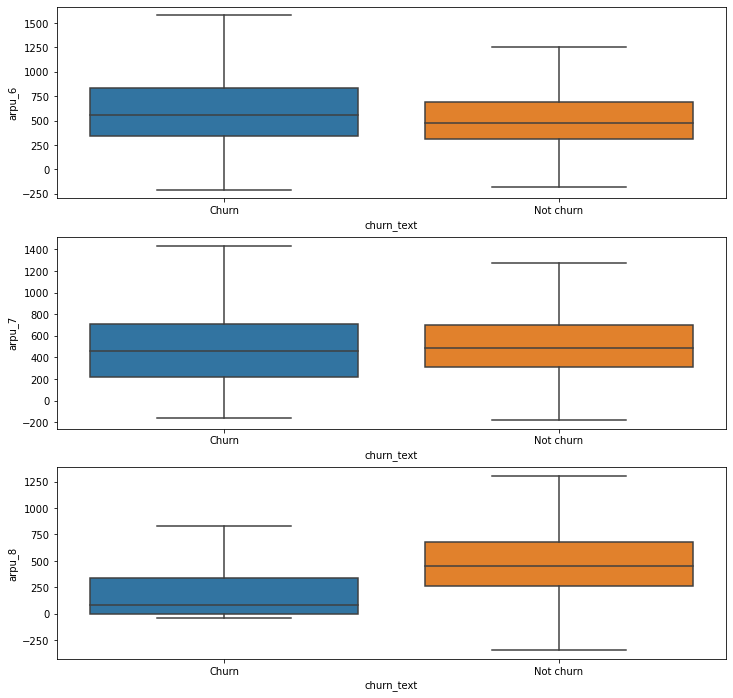

In [35]:

arpu_columns = ['arpu_6', 'arpu_7', 'arpu_8']
graph_boxPlot(arpu_columns,"churn_text", data_HighValue)


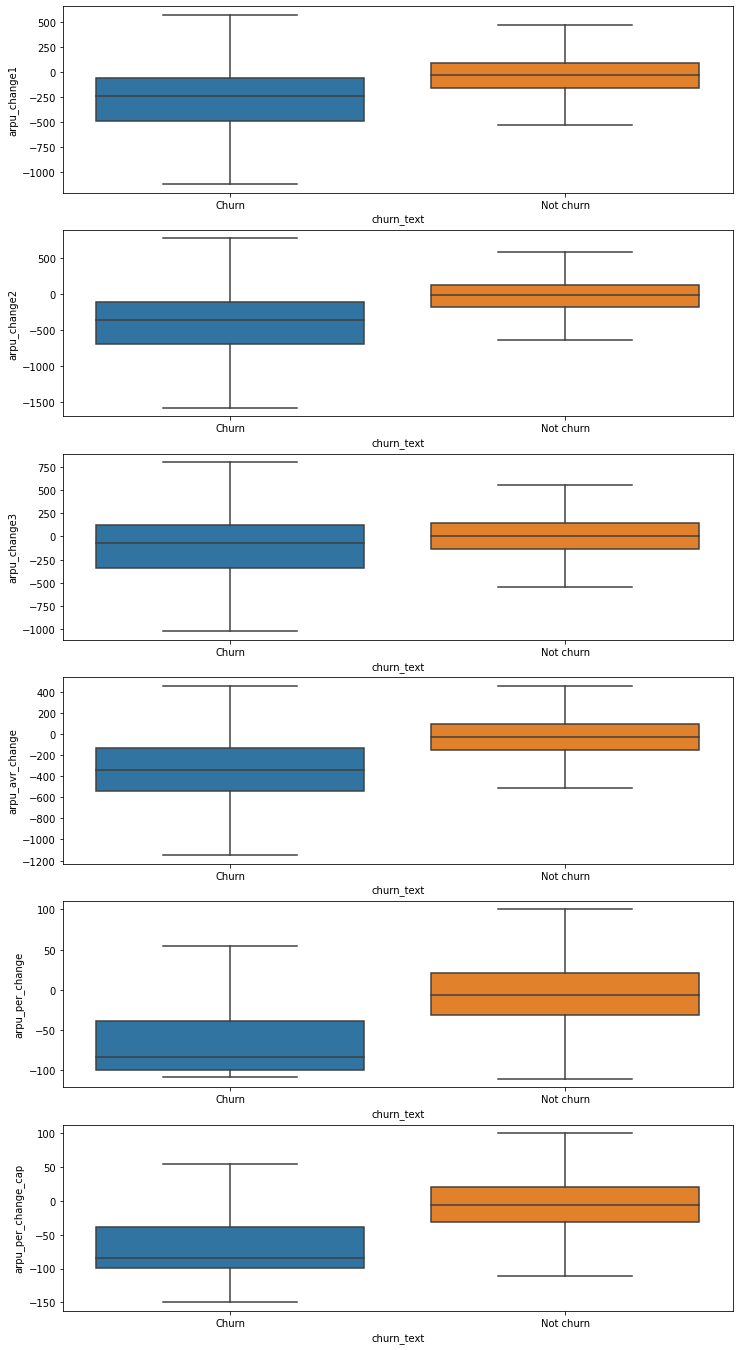

In [36]:
## let’s see how the changes in recharge distribute against Churn

## Difference of month 8 and month 7
data_HighValue["arpu_change1"] = data_HighValue.arpu_8 - data_HighValue.arpu_7
## Difference of month 8 and month 6
data_HighValue["arpu_change2"] = data_HighValue.arpu_8 - data_HighValue.arpu_6
## Difference of month 7 and month 6
data_HighValue["arpu_change3"] = data_HighValue.arpu_7 - data_HighValue.arpu_6
## Average of month 6 and month 7. And to keep it non zero, so added 1.
data_HighValue["arpu_avr_6_7"] = (data_HighValue.arpu_6 + data_HighValue.arpu_7)/2
data_HighValue["arpu_avr_6_7"] = data_HighValue["arpu_avr_6_7"] + 1
## Difference of month 8 and average of month 6 and 7
data_HighValue["arpu_avr_change"] = (1 + data_HighValue.arpu_8 - data_HighValue.arpu_avr_6_7)
## Percentage of Difference of month 8 and average of month 6 and 7
data_HighValue["arpu_per_change"] = (1 + data_HighValue.arpu_8 - data_HighValue.arpu_avr_6_7)*100.00/data_HighValue.arpu_avr_6_7
## adding a cap for the percentage difference
data_HighValue["arpu_per_change_cap"] = data_HighValue["arpu_per_change"].apply(lambda x: 150 if x>150 else x)
data_HighValue["arpu_per_change_cap"] = data_HighValue["arpu_per_change_cap"].apply(lambda x: -150 if x < -150 else x)

graph_boxPlot(["arpu_change1","arpu_change2","arpu_change3","arpu_avr_change","arpu_per_change","arpu_per_change_cap"],"churn_text", data_HighValue)

In [37]:
## Lets review different stat for churn data for "arpu" variables

data_HighValue.loc[data_HighValue.Churn==1,["arpu_6", "arpu_7", "arpu_8", "arpu_change1","arpu_change2","arpu_change3","arpu_avr_6_7","arpu_avr_change","arpu_per_change","arpu_per_change_cap","Churn"]].describe()

arpu_6        arpu_7       arpu_8  arpu_change1  arpu_change2  \
count   2441.000000   2441.000000  2441.000000   2441.000000   2441.000000   
mean     663.158246    540.165968   237.200793   -302.965176   -425.957454   
std      584.538210    540.367084   386.441008    474.827463    636.374959   
min     -209.465000   -158.963000   -37.887000 -11197.651000 -11505.508000   
25%      336.895000    221.160000     0.000000   -484.610000   -696.528000   
50%      556.661000    462.400000    78.357000   -239.503000   -367.647000   
75%      834.236000    707.563000   335.962000    -58.877000   -106.678000   
max    11505.508000  13224.119000  5228.826000   2748.248000   2622.800000   

       arpu_change3  arpu_avr_6_7  arpu_avr_change  arpu_per_change  \
count   2441.000000   2441.000000      2441.000000      2441.000000   
mean    -122.992278    602.662107      -364.461315       -54.369805   
std      686.579214    446.086312       444.262703       284.058319   
min   -11505.508000    -19.556500     -5811.052500     -3366.683711   
25%     -339.158000    367.791500      -542.808000       -99.650387   
50%      -74.712000    512.663500      -340.494500       -83.809667   
75%      122.084000    725.505000      -136.769000       -38.045256   
max    13197.879000   6626.179500      2408.987500     12870.700000   

       arpu_per_change_cap   Churn  
count          2441.000000  2441.0  
mean            -61.182349     1.0  
std              50.848116     0.0  
min            -150.000000     1.0  
25%             -99.650387     1.0  
50%             -83.809667     1.0  
75%             -38.045256     1.0  
max             150.000000     1.0

In [38]:
## Lets review different stat for NON churn data for "arpu" variables

data_HighValue.loc[data_HighValue.Churn==0,["arpu_6", "arpu_7", "arpu_8", "arpu_change1","arpu_change2","arpu_change3","arpu_avr_6_7","arpu_avr_change","arpu_per_change","arpu_per_change_cap","Churn"]].describe()

arpu_6        arpu_7        arpu_8  arpu_change1  arpu_change2  \
count  27560.000000  27560.000000  27560.000000  27560.000000   27560.00000   
mean     549.220390    562.608191    532.635710    -29.972481     -16.58468   
std      446.851067    474.005000    503.944081    316.893820     383.90049   
min    -2258.709000  -2014.045000   -945.808000  -4918.518000   -6191.33900   
25%      307.809250    315.592500    260.805250   -156.507750    -175.14025   
50%      476.028500    482.764500    447.090000    -23.321500     -19.95400   
75%      686.456500    697.694500    678.836750     95.538250     129.67400   
max    27731.088000  35145.834000  33543.624000  12008.570000   13608.66400   

       arpu_change3  arpu_avr_6_7  arpu_avr_change  arpu_per_change  \
count  27560.000000  27560.000000     27560.000000     27560.000000   
mean      13.387801    556.914290       -23.278580        14.826922   
std      339.262095    428.256484       308.424946       968.122165   
min    -5185.368000   -748.783000     -3895.784500     -1768.582188   
25%     -129.994000    344.910125      -150.605375       -31.655182   
50%        3.514500    483.531750       -27.460750        -6.359220   
75%      145.691000    671.794500        92.990875        21.064264   
max     7414.746000  31439.461000     12808.617000    106896.000000   

       arpu_per_change_cap    Churn  
count         27560.000000  27560.0  
mean             -2.544072      0.0  
std              48.617585      0.0  
min            -150.000000      0.0  
25%             -31.655182      0.0  
50%              -6.359220      0.0  
75%              21.064264      0.0  
max             150.000000      0.0

- To understand the behaviour, we need to concentrate in the changes in payments per month. so, we can use the difference of average amount in "good time" from 'action' time. 

- So, we will calculate the change for each data group and remove the original variables for _6 and _7 months and average of it. At end we will keep the data for month _8 and changes from average data for month 6 and 7.

In [39]:
## list of _6 month variables excluding dates
all_columns  = data_HighValue.select_dtypes(["float64","int64","int32"]).columns.to_list()

column_6 = []
for col in all_columns:
    if (col.find("_6")>=0) & (col.find("date_") < 0):
        column_6.append(col)
print("Number of variables: ", len(column_6))
print(column_6)        


Number of variables:  54
['arpu_6', 'onnet_mou_6', 'offnet_mou_6', 'roam_ic_mou_6', 'roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'total_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6', 'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6', 'total_rech_num_6', 'total_rech_amt_6', 'max_rech_amt_6', 'last_day_rch_amt_6', 'total_rech_data_6', 'max_rech_data_6', 'count_rech_2g_6', 'count_rech_3g_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_3g_6', 'arpu_2g_6', 'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6', 'fb_user_6', 'vbc_3g_6', 'total_rech_data_comb_6', 'total_rech_6', 'avg_total_amount_6_7', 'arpu_avr_6_7']


In [40]:
## There are lot of OG variables, let see if they have any relationship

#all_columns  = data_HighValue.select_dtypes(["float64","int64","int32"]).columns.to_list()

var = "og"
column_rand = []
for col in all_columns:
    if (col.find(var)>=0) & (col.find("_6") >= 0):
        column_rand.append(col)

data_HighValue[column_rand][:5]

roam_og_mou_6  loc_og_t2t_mou_6  loc_og_t2m_mou_6  loc_og_t2f_mou_6  \
0            0.00              0.00              0.00              0.00   
7           23.74             51.39            308.63             62.13   
8            0.00            297.13             80.96              0.00   
21           0.00              4.48             91.81              0.75   
23           0.00             48.96             82.94              0.00   

    loc_og_t2c_mou_6  loc_og_mou_6  std_og_t2t_mou_6  std_og_t2m_mou_6  \
0                0.0          0.00              0.00              0.00   
7                0.0        422.16              4.30             49.89   
8                0.0        378.09            116.56             13.69   
21               0.0         97.04             97.93            665.36   
23               0.0        131.91              0.00              2.36   

    std_og_t2f_mou_6  std_og_mou_6  isd_og_mou_6  spl_og_mou_6  og_others_6  \
0               0.00          0.00           0.0           0.0          0.0   
7               6.66         60.86           0.0           4.5          0.0   
8               0.00        130.26           0.0           0.0          0.0   
21              0.00        763.29           0.0           0.0          0.0   
23              0.00          2.36           0.0           0.1          0.0   

    total_og_mou_6  
0             0.00  
7           487.53  
8           508.36  
21          860.34  
23          134.38

- We can see for **og = outgoing calls**,
  - 1. roam_og_mou_6
    2. loc_og_t2t_mou_6 + loc_og_t2m_mou_6 + loc_og_t2f_mou_6 + loc_og_t2c_mou_6 = loc_og_mou_6
    3. std_og_t2t_mou_6 + std_og_t2m_mou_6 + std_og_t2f_mou_6 = std_og_mou_6
    4. isd_og_mou_6
    5. spl_og_mou_6 
    6. og_others_6
    7. loc_og_mou_6 + std_og_mou_6 + isd_og_mou_6 + spl_og_mou_6 + og_others_6 = total_og_mou_6 


In [41]:
## for ic = incomming calls

#all_columns  = data_HighValue.select_dtypes(["float64","int64","int32"]).columns.to_list()

var = "ic"
column_rand = []
for col in all_columns:
    if (col.find(var)>=0) & (col.find("_6") >= 0):
        column_rand.append(col)
        
data_HighValue[column_rand][:5]

roam_ic_mou_6  loc_ic_t2t_mou_6  loc_ic_t2m_mou_6  loc_ic_t2f_mou_6  \
0            0.00              0.00              0.00              0.00   
7           16.23             58.14            217.56            152.16   
8            0.00             23.84             57.58              0.00   
21           0.00              2.48            118.23              4.61   
23           0.00             20.71             95.91              0.00   

    loc_ic_mou_6  std_ic_t2t_mou_6  std_ic_t2m_mou_6  std_ic_t2f_mou_6  \
0           0.00              0.00              0.00              0.00   
7         427.88             36.89             91.44             52.19   
8          81.43              0.00             22.43              0.00   
21        125.33             14.06             67.69              0.00   
23        116.63              0.51              2.43              0.00   

    std_ic_mou_6  total_ic_mou_6  spl_ic_mou_6  isd_ic_mou_6  ic_others_6  
0           0.00            0.00          0.00          0.00         0.00  
7         180.54          626.46          0.21          2.06        15.74  
8          22.43          103.86          0.00          0.00         0.00  
21         81.76          207.09          0.00          0.00         0.00  
23          2.94          119.58          0.00          0.00         0.00

- We can see for **ic = incoming calls**,
- Same as og variable set, we have 4 variables that are combination of other variables.

In [42]:
data_HighValue.drop(["arpu_change1", "arpu_change2", "arpu_change3", "arpu_avr_change","arpu_per_change","arpu_per_change_cap"],axis=1, inplace= True)

def calculate_per_diff(data_HighValue,variable):
    ## calculating avg of month 6 and 7
    data_HighValue[variable+"_avr_6_7"] = data_HighValue[[variable+"_6",variable+"_7"]].mean(axis=1)   
    ## finding diffence of month 8 and avg of month 6 and 7.
    data_HighValue[variable+"_per_change"] = (data_HighValue[variable+"_8"] - data_HighValue[variable+"_avr_6_7"])
    ## removing original variables for month 6, 7 and avg of 6 and 7.
    data_HighValue.drop([variable+"_6",variable+"_7",variable+"_avr_6_7"], axis=1, inplace=True)



In [43]:
### calculate the difference of usage in action phase from average of good time phase.
## arpu_6
calculate_per_diff(data_HighValue,"arpu")

## onnet_mou_6
calculate_per_diff(data_HighValue,"onnet_mou")

## offnet_mou_6
calculate_per_diff(data_HighValue,"offnet_mou")

## roam_ic_mou_6
calculate_per_diff(data_HighValue,"roam_ic_mou")

## roam_og_mou_6
calculate_per_diff(data_HighValue,"roam_og_mou")

## loc_og_t2t_mou_6
calculate_per_diff(data_HighValue,"loc_og_t2t_mou")

## loc_og_t2m_mou_6
calculate_per_diff(data_HighValue,"loc_og_t2m_mou")

## loc_og_t2f_mou_6
calculate_per_diff(data_HighValue,"loc_og_t2f_mou")

## loc_og_t2c_mou_6
calculate_per_diff(data_HighValue,"loc_og_t2c_mou")

## loc_og_mou_6
calculate_per_diff(data_HighValue,"loc_og_mou")

## std_og_t2t_mou_6
calculate_per_diff(data_HighValue,"std_og_t2t_mou")

## std_og_t2m_mou_6
calculate_per_diff(data_HighValue,"std_og_t2m_mou")

## std_og_t2f_mou_6
calculate_per_diff(data_HighValue,"std_og_t2f_mou")

## std_og_mou_6
calculate_per_diff(data_HighValue,"std_og_mou")

## isd_og_mou_6
calculate_per_diff(data_HighValue,"isd_og_mou")

## spl_og_mou_6
calculate_per_diff(data_HighValue,"spl_og_mou")

## og_others_6
calculate_per_diff(data_HighValue,"og_others")

## total_og_mou_6
calculate_per_diff(data_HighValue,"total_og_mou")

## loc_ic_t2t_mou_6
calculate_per_diff(data_HighValue,"loc_ic_t2t_mou")

## loc_ic_t2m_mou_6
calculate_per_diff(data_HighValue,"loc_ic_t2m_mou")

## loc_ic_t2f_mou_6
calculate_per_diff(data_HighValue,"loc_ic_t2f_mou")

## loc_ic_mou_6
calculate_per_diff(data_HighValue,"loc_ic_mou")

## std_ic_t2t_mou_6
calculate_per_diff(data_HighValue,"std_ic_t2t_mou")

## std_ic_t2m_mou_6
calculate_per_diff(data_HighValue,"std_ic_t2m_mou")

## std_ic_t2f_mou_6
calculate_per_diff(data_HighValue,"std_ic_t2f_mou")

## std_ic_mou_6
calculate_per_diff(data_HighValue,"std_ic_mou")

## total_ic_mou_6
calculate_per_diff(data_HighValue,"total_ic_mou")

## spl_ic_mou_6
calculate_per_diff(data_HighValue,"spl_ic_mou")

## isd_ic_mou_6
calculate_per_diff(data_HighValue,"isd_ic_mou")

## ic_others_6
calculate_per_diff(data_HighValue,"ic_others")

## total_rech_num_6
calculate_per_diff(data_HighValue,"total_rech_num")

## total_rech_amt_6
calculate_per_diff(data_HighValue,"total_rech_amt")

## max_rech_amt_6
calculate_per_diff(data_HighValue,"max_rech_amt")

## last_day_rch_amt_6
calculate_per_diff(data_HighValue,"last_day_rch_amt")

# ## total_rech_data_6
# calculate_per_diff(data_HighValue,"total_rech_data")

## total_rech_data_comb_6 -- derived
calculate_per_diff(data_HighValue,"total_rech_data_comb")

## max_rech_data_6
calculate_per_diff(data_HighValue,"max_rech_data")

# ## count_rech_2g_6-- nominal data
# calculate_per_diff(data_HighValue,"count_rech_2g")

# ## count_rech_3g_6-- nominal data
# calculate_per_diff(data_HighValue,"count_rech_3g")

# ## av_rech_amt_data_6-- using derived variable- total_rech_data
# calculate_per_diff(data_HighValue,"av_rech_amt_data")

## vol_2g_mb_6
calculate_per_diff(data_HighValue,"vol_2g_mb")

## vol_3g_mb_6
calculate_per_diff(data_HighValue,"vol_3g_mb")

# # ## arpu_3g_6
calculate_per_diff(data_HighValue,"arpu_3g")

# # ## arpu_2g_6
calculate_per_diff(data_HighValue,"arpu_2g")

# ## night_pck_user_6-- nominal data
# calculate_per_diff(data_HighValue,"night_pck_user")

# ## monthly_2g_6-- nominal data
# calculate_per_diff(data_HighValue,"monthly_2g")

# ## sachet_2g_6-- nominal data
# calculate_per_diff(data_HighValue,"sachet_2g")

# ## monthly_3g_6-- nominal data
# calculate_per_diff(data_HighValue,"monthly_3g")

# ## sachet_3g_6-- nominal data
# calculate_per_diff(data_HighValue,"sachet_3g")

# ## fb_user_6-- nominal data
# calculate_per_diff(data_HighValue,"fb_user")

## vbc_3g_6
calculate_per_diff(data_HighValue,"vbc_3g")

## total_rech_6
calculate_per_diff(data_HighValue,"total_rech")



In [44]:
## check stats for newly created variables.
all_columns  = data_HighValue.select_dtypes(["float64","int64","int32"]).columns.to_list()

var = "_per_change"
column_rand = []
for col in all_columns:
    if (col.find(var)>=0):
        column_rand.append(col)

data_HighValue[column_rand][:5]

arpu_per_change  onnet_mou_per_change  offnet_mou_per_change  \
0            7.7025                  0.00                  0.000   
7         1961.9650                 -3.97               -184.385   
8         -298.1100               -347.28                 48.835   
21          81.6570                -32.12                156.085   
23         232.8425                -16.23                118.505   

    roam_ic_mou_per_change  roam_og_mou_per_change  loc_og_t2t_mou_per_change  \
0                     0.00                   0.000                      0.000   
7                     6.78                  19.895                     -1.105   
8                     0.00                   0.000                   -244.870   
21                    0.00                   0.000                     18.020   
23                    0.00                   0.000                    -16.230   

    loc_og_t2m_mou_per_change  loc_og_t2f_mou_per_change  \
0                       0.000                      0.000   
7                    -215.725                     -5.405   
8                     -25.230                      0.000   
21                     14.940                      1.205   
23                     65.585                      0.000   

    loc_og_t2c_mou_per_change  loc_og_mou_per_change  \
0                        0.00                  0.000   
7                        0.00               -222.245   
8                        7.15               -270.095   
21                       0.00                 34.175   
23                      17.71                 49.345   

    std_og_t2t_mou_per_change  std_og_t2m_mou_per_change  \
0                       0.000                      0.000   
7                      -1.785                      8.315   
8                    -102.415                     63.825   
21                    -50.145                    139.940   
23                      0.000                     35.255   

    std_og_t2f_mou_per_change  std_og_mou_per_change  isd_og_mou_per_change  \
0                        0.00                  0.000                  0.000   
7                        3.31                  9.840                  9.920   
8                        0.00                -38.590                  0.000   
21                       0.00                 89.800                  0.000   
23                       0.00                 35.255                 -0.005   

    spl_og_mou_per_change  og_others_per_change  total_og_mou_per_change  \
0                    0.00                   0.0                    0.000   
7                    4.25                   0.0                 -198.225   
8                   10.23                   0.0                 -298.450   
21                   0.00                   0.0                  123.975   
23                  17.66                   0.0                  102.270   

    loc_ic_t2t_mou_per_change  loc_ic_t2m_mou_per_change  \
0                       0.160                      4.130   
7                     -17.890                    -98.335   
8                     -16.530                    -20.300   
21                     13.205                     32.730   
23                     35.765                     42.205   

    loc_ic_t2f_mou_per_change  loc_ic_mou_per_change  \
0                       1.150                  5.440   
7                     -87.280               -203.515   
8                       0.000                -36.840   
21                      6.665                 52.605   
23                      0.710                 78.690   

    std_ic_t2t_mou_per_change  std_ic_t2m_mou_per_change  \
0                       0.000                      0.000   
7                       6.030                     32.115   
8                      -0.190                    -12.605   
21                     -9.840                     48.780   
23                     13.125                     35.250   

    std_ic_t2f_mou_per_change  std_ic_mou_per_change  tota

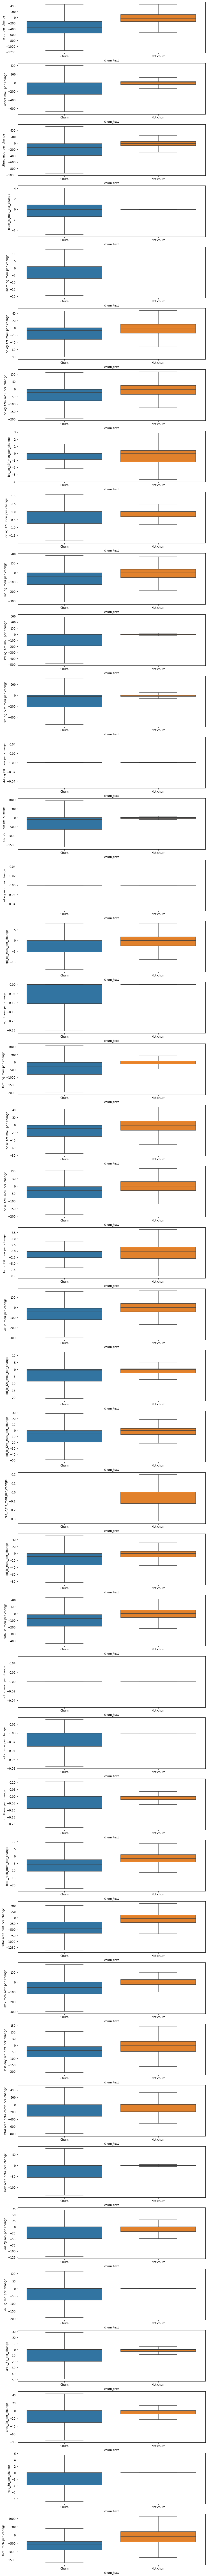

In [45]:
## plot newly created features. (removed the outlier data points while show plots)
graph_boxPlot(column_rand,"churn_text", data_HighValue)

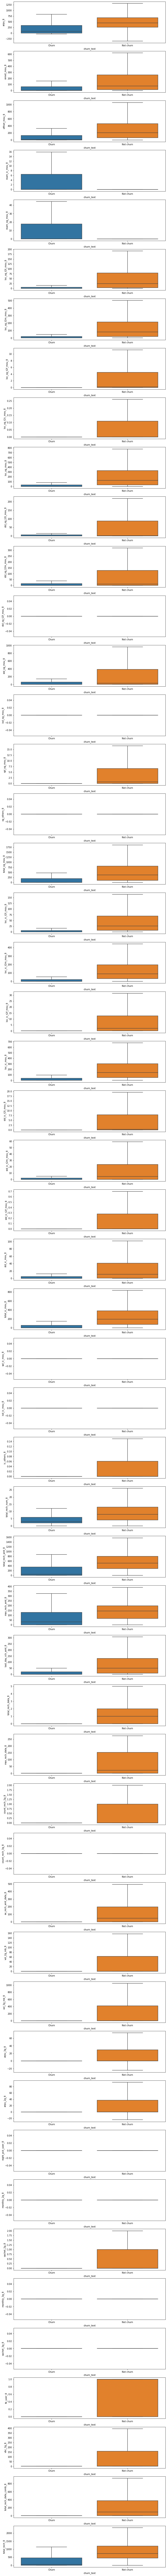

In [46]:
## check stats for data in action phase.
all_columns  = data_HighValue.select_dtypes(["float64","int64","int32"]).columns.to_list()

var = "_8"
column_8 = []
for col in all_columns:
    if (col.find(var)>=0):
        column_8.append(col)

graph_boxPlot(column_8,"churn_text", data_HighValue)

In [47]:
print("Shape of data",data_HighValue.shape )
data_HighValue.head()

Shape of data (30001, 125)


mobile_number    arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  \
0      7000842753   213.803         0.00          0.00           0.00   
7      7000701601  3171.480        52.29        325.91          31.64   
8      7001524846   137.362        35.08        136.48           0.00   
21     7002124215   637.760        85.14        983.39           0.00   
23     7000887461   366.966        33.58        205.89           0.00   

    roam_og_mou_8  loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  \
0            0.00              0.00              0.00              0.00   
7           38.06             40.28            162.28             53.23   
8            0.00             12.49             50.54              0.00   
21           0.00             23.34            104.81              1.58   
23           0.00             33.58            148.56              0.00   

    loc_og_t2c_mou_8  loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  \
0               0.00          0.00              0.00              0.00   
7               0.00        255.79             12.01             49.14   
8               7.15         63.04             22.58             75.69   
21              0.00        129.74             61.79            876.99   
23             17.71        182.14              0.00             39.61   

    std_og_t2f_mou_8  std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  \
0               0.00          0.00          0.00          0.00          0.0   
7              16.68         77.84         10.01          6.50          0.0   
8               0.00         98.28          0.00         10.23          0.0   
21              0.00        938.79          0.00          0.00          0.0   
23              0.00         39.61          0.00         17.71          0.0   

    total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
0             0.00              0.16              4.13              1.15   
7           350.16             27.31            121.19             39.53   
8           171.56              0.31             15.48              0.00   
21         1068.54             19.54            129.16             10.39   
23          239.48             76.64            146.84              0.71   

    loc_ic_mou_8  std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  \
0           5.44              0.00              0.00              0.00   
7         188.04             30.39            141.33             22.21   
8          15.79              0.10              0.65              0.00   
21        159.11              0.18            101.74              0.00   
23        224.21             13.38             43.91              0.00   

    std_ic_mou_8  total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  \
0           0.00            5.44           0.0          0.00         0.00   
7         193.94          428.74           0.0         31.59        15.14   
8           0.75           16.54           0.0          0.00         0.00   
21        101.93          261.04           0.0          0.00         0.00   
23         57.29          298.33           0.0          3.74        13.06   

    total_rech_num_8  total_rech_amt_8  max_rech_amt_8 date_of_last_rech_6  \
0                  2               252             252           6/21/2014   
7                  7              3638            1580           6/27/2014   
8                 14               120              30           6/25/2014   
21                27               718              50           6/30/2014   
23                 4               439             179           6/18/2014   

   date_of_last_rech_7 date_of_last_rech_8  last_day_rch_amt_8  \
0            7/16/2014            8/8/2014                 252   
7            7/25/2014           8/26/2014                 779   
8            7/31/2014           8/30/2014                  10   
21           7/31/2014           8/31/2014                  50   
23            7/7/2014        

<AxesSubplot:xlabel='churn_text', ylabel='aon'>

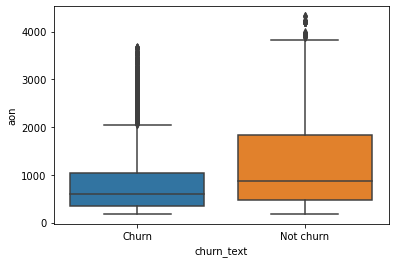

In [48]:
## AON -- Age on network - number of days the customer is using the operator T network
sns.boxplot(x=data_HighValue.churn_text, y=data_HighValue.aon)


In [49]:


## This will create graph for object type data or nominal data.
def Cat_graph_sns(columns,Horizental=True, legend_="upper right",TARGET_label = "churn_text", Data_current= data_HighValue):
    
    #plt.figure(figsize=(22,len(columns)*4))
    #gs = gridspec.GridSpec(len(columns),1)
#     plt.figure(figsize=(8,10))
    
    for i, col in enumerate(columns):
        #ax = plt.subplot(gs[i])

        x,y = TARGET_label, col
        Data = Data_current.groupby(x)[y].value_counts(normalize=True).mul(100).rename('percent').reset_index()
        #print(Data)
        ax = sns.catplot(x=x,y='percent',hue=y,data = Data, kind='bar', height=3, aspect=1.5)
        
        #plt.xticks(rotation=90)
    '''
        plt.legend()
        if Horizental==True:
          plt.xticks(rotation=0)
        else:
          plt.xticks(rotation=90)
        ax.ylabel("Percentage (%)")
    '''    
    plt.show()    



In [50]:
## let's create some variables for Night pack and fb user
## if no change from good phase to action phase- marked 1
## if 0 change from good phase to 1 in action phase- marked 2
## if 1 change from good phase to 0 in action phase- marked 0

def mark_change_nightpck(data_HighValue):
    x=data_HighValue["night_pck_user_6_7"]
    y=data_HighValue["night_pck_user_8"]
    k=0
    if x==1 and y==1:
        k=1
    elif x==1 and y==0:
        k=0
    elif x==0 and y==0:
        k=1
    elif x==0 and y==1:
        k=2
    return k

def mark_change_fb(data_HighValue):
    x=data_HighValue["fb_user_6_7"]
    y=data_HighValue["fb_user_8"]
    k=0
    if x==1 and y==1:
        k=1
    elif x==1 and y==0:
        k=0
    elif x==0 and y==0:
        k=1
    elif x==0 and y==1:
        k=2
    return k

data_HighValue["night_pck_user_6_7"] = np.where((data_HighValue.night_pck_user_6 ==1) | (data_HighValue.night_pck_user_7 ==1),1, 0)
data_HighValue["night_pck_user_change"] = data_HighValue.apply(mark_change_nightpck, axis=1)

data_HighValue["fb_user_6_7"] = np.where((data_HighValue.fb_user_6 ==1) | (data_HighValue.fb_user_7 ==1),1, 0)
data_HighValue["fb_user_change"] = data_HighValue.apply(mark_change_fb, axis=1)


# data_HighValue.loc[((data_HighValue.night_pck_user_6_7 ==0) & (data_HighValue.night_pck_user_8 == 1)), ["night_pck_user_change","night_pck_user_6_7","night_pck_user_6","night_pck_user_7","night_pck_user_8"]].head()
data_HighValue.loc[((data_HighValue.fb_user_6_7 ==0) & (data_HighValue.fb_user_8 == 1)), ["fb_user_change","fb_user_6_7","fb_user_6","fb_user_7","fb_user_8"]].head()




fb_user_change  fb_user_6_7  fb_user_6  fb_user_7  fb_user_8
693                2            0        0.0        0.0        1.0
800                2            0        0.0        0.0        1.0
928                2            0        0.0        0.0        1.0
1024               2            0        0.0        0.0        1.0
1066               2            0        0.0        0.0        1.0

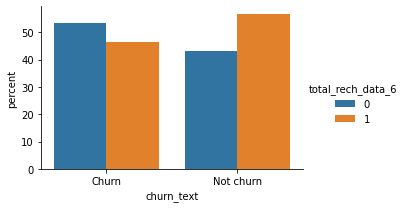

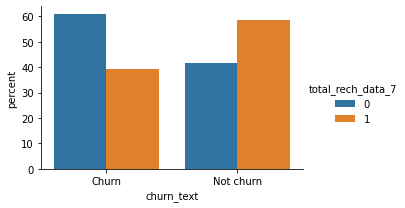

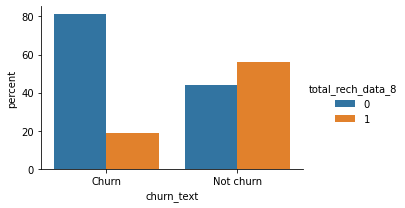

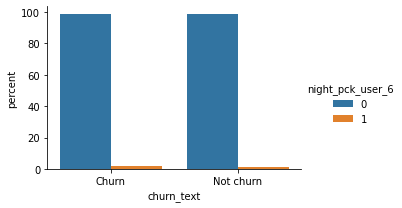

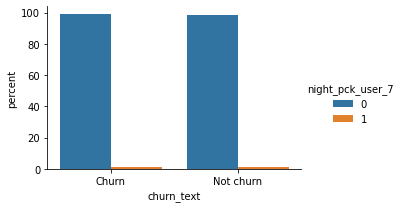

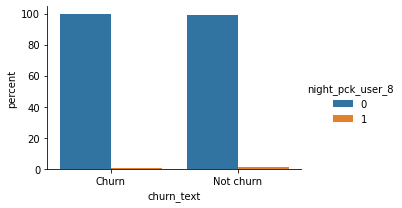

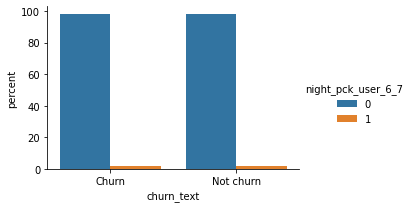

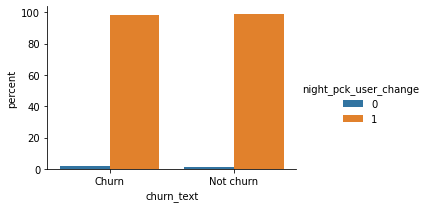

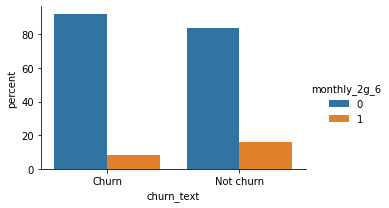

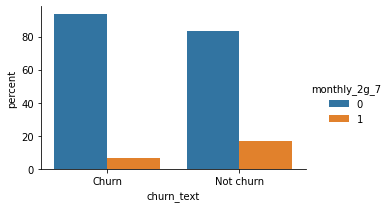

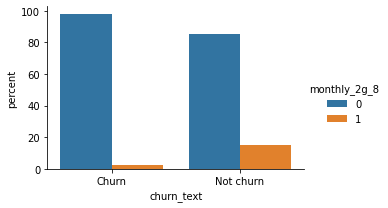

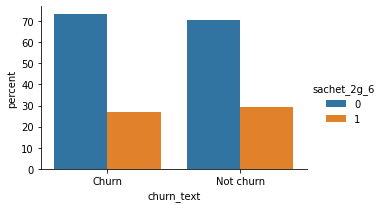

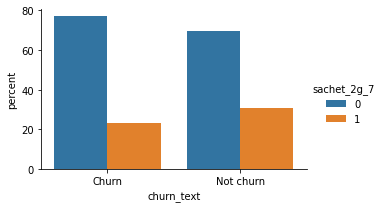

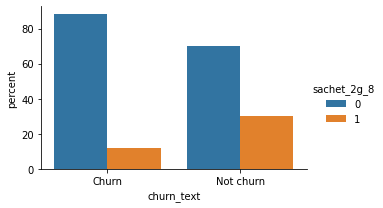

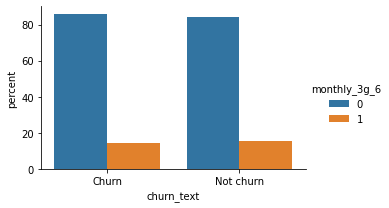

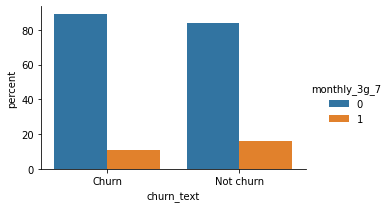

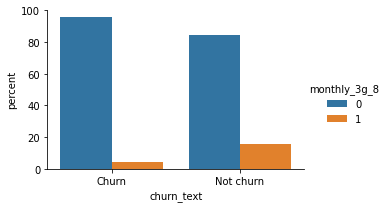

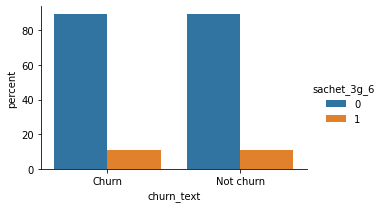

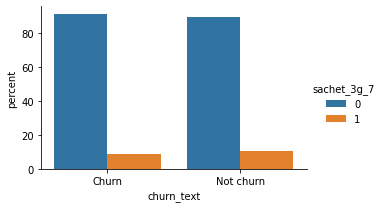

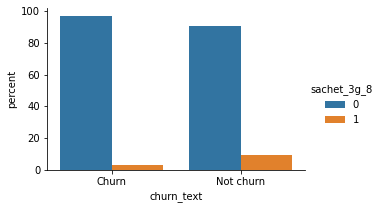

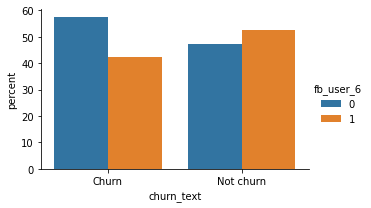

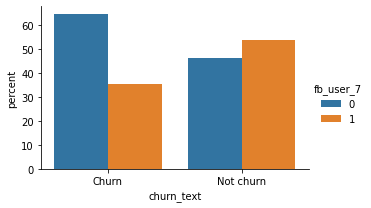

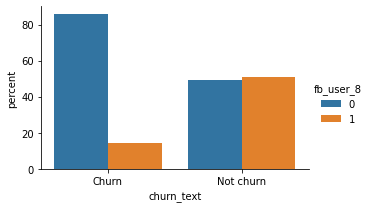

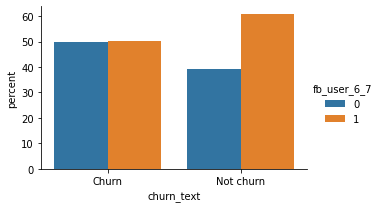

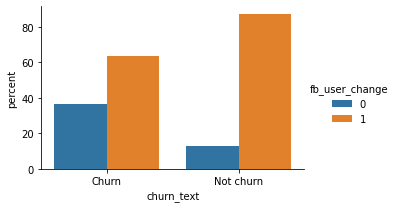

In [51]:
Nominal_columns = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
                   'night_pck_user_6','night_pck_user_7', 'night_pck_user_8', 'night_pck_user_6_7','night_pck_user_change', 
                   'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 
                   'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 
                   'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_6_7', 'fb_user_change']

## From the data we can see many of these variables has multiple categories. To see the variation, lets convert them 
## in binary format.

def convert_to_binary(x):
    if x==0:
        return 0
    else:
        return 1

for col in Nominal_columns:
    data_HighValue[col] = data_HighValue[col].apply(convert_to_binary)

Cat_graph_sns(Nominal_columns)

### EDA Observation
- We can see total recharge for data comparatively decrease more for churn customer.
- there is no visible change in night pack user for non churn customer, however we can see it declined for churn customer over months.
- We can see similar trends for 2G, 3G usage volume, fb or social networking usage and usage in sachet.
- Median value for changes in average revenue per user is higher for non churn customer.
- long time customer tends to churn less than short time customer.
- from various box plots, we can see customer who tends to churn decrease their different usage like incoming calls, outgoing calls to same or other network.
- usage of STD or roaming is higher in action phase from churn customer than non churn customer.
- total recharge amount, maximum recharge amount are higher for non churn customer in action phase.


In [52]:
## corelation of each variable against target data.

all_columns  = data_HighValue.select_dtypes(["float64","int64","int32"]).columns.to_list()


# Let's see the correlation matrix 
# plt.figure(figsize = (20,10))        # Size of the figure
# sns.heatmap(data_HighValue[all_columns].corr(),annot = True)
# plt.show()

corr_df = round(data_HighValue[all_columns].corr().Churn.sort_values(ascending=False)*100, 3)
corr_df[corr_df.values<-10]
corr_df

Churn                              100.000
roam_og_mou_8                        6.756
roam_ic_mou_8                        5.917
og_others_8                          0.777
night_pck_user_6                     0.515
count_rech_3g_6                      0.369
night_pck_user_6_7                   0.087
sachet_3g_6                          0.037
roam_ic_mou_per_change              -0.158
og_others_per_change                -0.422
isd_og_mou_8                        -0.473
night_pck_user_7                    -0.824
monthly_3g_6                        -1.080
ic_others_per_change                -1.148
roam_og_mou_per_change              -1.211
night_pck_user_change               -1.368
count_rech_2g_6                     -1.399
sachet_2g_6                         -1.570
avg_total_amount_6_7                -1.607
sachet_3g_7                         -1.616
ic_others_8                         -1.919
std_ic_t2f_mou_per_change           -2.084
count_rech_3g_7                     -2.123
night_pck_u

#### Some points to remove some variables
- mobile_number - it’s like an id
- date_of_last_rech -- these are dates and we have recharge amount in "total_rech", which looks more logical to predict churn. So will remove the date columns.
- date_of_last_rech_data -- same for data rechange with counts present in "total_rech_data" variable. So, we will remove this date variable.
- count_rech_2g, count_rech_3g -- Customer ether using 2g or 3g. and the sum of the counts from these variables present in "total_rech_data". So we will discard them.
- av_rech_amt_data : we have initially converted them into total amount paid for data and stored in "total_rech_data_comb". So, we will remove it.
- avg_total_amount_6_7 - used to decide the high value customer. let’s remove it.
- churn_text : used for better data visualisation. will remove it as we have alternative numeric data.


In [53]:
## lets remove dates, avg_data_recharge, count of recharge variables as we have derived new variables from there.
## also remove variables for fb_user for good phase.

removed_columns = ['mobile_number','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','count_rech_2g_6','count_rech_2g_7','count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','avg_total_amount_6_7','churn_text']
data_HighValue.drop(removed_columns, axis=1, inplace=True)

data_HighValue.drop(['night_pck_user_6','night_pck_user_7','night_pck_user_6_7'], axis=1, inplace=True)
data_HighValue.drop(["fb_user_6","fb_user_7","fb_user_6_7"], axis=1, inplace=True)

print("Shape of final data:",data_HighValue.shape)
data_HighValue.head()

Shape of final data: (30001, 105)


arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0    213.803         0.00          0.00           0.00           0.00   
7   3171.480        52.29        325.91          31.64          38.06   
8    137.362        35.08        136.48           0.00           0.00   
21   637.760        85.14        983.39           0.00           0.00   
23   366.966        33.58        205.89           0.00           0.00   

    loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0               0.00              0.00              0.00              0.00   
7              40.28            162.28             53.23              0.00   
8              12.49             50.54              0.00              7.15   
21             23.34            104.81              1.58              0.00   
23             33.58            148.56              0.00             17.71   

    loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0           0.00              0.00              0.00              0.00   
7         255.79             12.01             49.14             16.68   
8          63.04             22.58             75.69              0.00   
21        129.74             61.79            876.99              0.00   
23        182.14              0.00             39.61              0.00   

    std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0           0.00          0.00          0.00          0.0            0.00   
7          77.84         10.01          6.50          0.0          350.16   
8          98.28          0.00         10.23          0.0          171.56   
21        938.79          0.00          0.00          0.0         1068.54   
23         39.61          0.00         17.71          0.0          239.48   

    loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0               0.16              4.13              1.15          5.44   
7              27.31            121.19             39.53        188.04   
8               0.31             15.48              0.00         15.79   
21             19.54            129.16             10.39        159.11   
23             76.64            146.84              0.71        224.21   

    std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0               0.00              0.00              0.00          0.00   
7              30.39            141.33             22.21        193.94   
8               0.10              0.65              0.00          0.75   
21              0.18            101.74              0.00        101.93   
23             13.38             43.91              0.00         57.29   

    total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0             5.44           0.0          0.00         0.00                 2   
7           428.74           0.0         31.59        15.14                 7   
8            16.54           0.0          0.00         0.00                14   
21          261.04           0.0          0.00         0.00                27   
23          298.33           0.0          3.74        13.06                 4   

    total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_6  \
0                252             252                 252                  1   
7               3638            1580                 779                  0   
8                120              30                  10                  0   
21               718              50                  50                  0   
23               439             179                   0                  0   

    total_rech_data_7  total_rech_data_8  max_rech_data_8  vol_2g_mb_8  \
0                   1                  1            252.0         5.75   
7                   0                  0              0.0         0.00   
8                   1                  1             23.0         0.03   
21                  0                  0  

In [54]:
data_HighValue.describe()

arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
count  30001.000000  30001.000000  30001.000000   30001.000000   30001.000000   
mean     508.597957    234.112539    335.077044      12.500551      19.865615   
std      501.961981    458.448598    482.062509      74.125281     104.719009   
min     -945.808000      0.000000      0.000000       0.000000       0.000000   
25%      231.473000     10.390000     46.740000       0.000000       0.000000   
50%      427.585000     65.610000    182.790000       0.000000       0.000000   
75%      661.491000    239.960000    438.890000       0.000000       0.000000   
max    33543.624000  10752.560000  14007.340000    4169.810000    5337.040000   

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count      30001.000000      30001.000000      30001.000000      30001.000000   
mean          78.077112        151.756812          5.886385          1.707746   
std          227.373609        233.660905         19.502281          7.208138   
min            0.000000          0.000000          0.000000          0.000000   
25%            2.530000         13.090000          0.000000          0.000000   
50%           20.730000         67.760000          0.000000          0.000000   
75%           72.040000        196.960000          3.930000          0.010000   
max        10752.560000       4961.330000        928.490000        351.830000   

       loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
count  30001.000000      30001.000000      30001.000000      30001.000000   
mean     235.728174        148.441175        157.350068          1.584734   
std      363.370172        397.564547        409.100284         10.931804   
min        0.000000          0.000000          0.000000          0.000000   
25%       22.460000          0.000000          0.000000          0.000000   
50%      110.810000          0.630000          9.460000          0.000000   
75%      310.610000         78.190000        117.780000          0.000000   
max    11039.910000       8014.430000      13950.040000        516.910000   

       std_og_mou_8  isd_og_mou_8  spl_og_mou_8   og_others_8  total_og_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000    30001.000000   
mean     307.379315      1.948970      6.557204      0.057607      551.678812   
std      608.976504     44.712024     20.311857      3.315125      700.478180   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%        0.000000      0.000000      0.000000      0.000000       72.360000   
50%       25.480000      0.000000      0.430000      0.000000      333.540000   
75%      357.230000      0.000000      6.150000      0.000000      774.780000   
max    13980.060000   5681.540000    954.510000    394.930000    14043.060000   

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
count      30001.000000      30001.000000      30001.000000  30001.000000   
mean          62.619432        146.232731         14.403175    223.264679   
std          158.912293        214.882624         43.305191    308.315153   
min            0.000000          0.000000          0.000000      0.000000   
25%            4.880000         24.210000          0.000000     40.530000   
50%           22.610000         80.040000          1.680000    128.730000   
75%           65.080000        185.730000         11.160000    285.440000   
max         4003.210000       4643.490000       1588.530000   5388.740000   

       std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
count      30001.000000      30001.000000      30001.000000  30001.000000   
mean          13.913705         27.922597          2.561970     44.401653   
std           71.338522        103.341828         19.896938    138.813305   
min            0.000000          0.000000          0.000000      0.000000   
25%            0.000000          0.000000         

### Handling Outlier

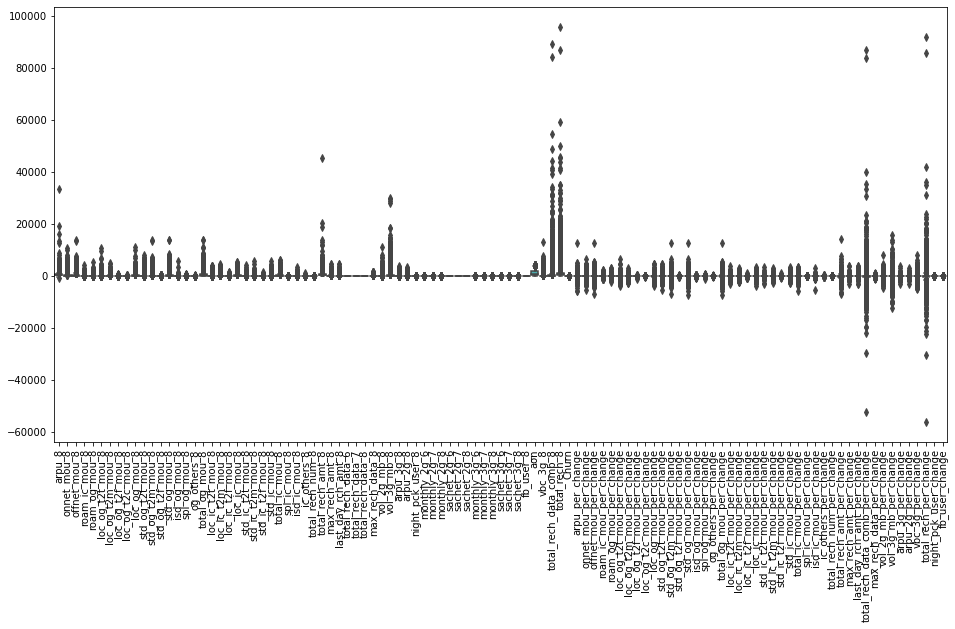

In [55]:
#plot the boxplot for each numerical variable
plt.figure(figsize = (16,8))
plt.xticks(rotation = 90)
sns.boxplot(data = data_HighValue)
plt.show()

In [56]:
## As most of the values are long type, we will cap the outliers
data_HighValue2 = data_HighValue.copy()
num_cols = data_HighValue2.select_dtypes(["float64","int64","int32"]).columns.to_list()

for col in num_cols:
    data_HighValue2[col] = np.where(data_HighValue2[col] < data_HighValue2[col].quantile(0.05), data_HighValue2[col].quantile(0.05), data_HighValue2[col])
    data_HighValue2[col] = np.where(data_HighValue2[col] > data_HighValue2[col].quantile(0.95), data_HighValue2[col].quantile(0.95), data_HighValue2[col])

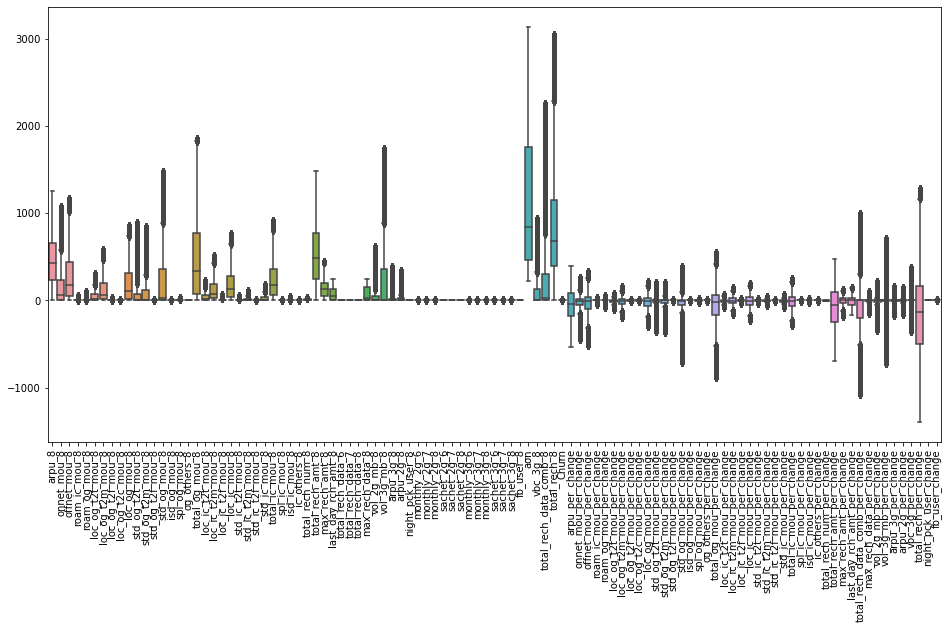

In [57]:
#plot the boxplot for each numerical variable
plt.figure(figsize = (16,8))
plt.xticks(rotation = 90)
sns.boxplot(data = data_HighValue2)
plt.show()

### Separating independent and target variables for model building

In [58]:
X = data_HighValue2.drop(["Churn"], axis=1)
y = data_HighValue2.Churn

print("shape of X: ", X.shape)
print("shape of y: ", y.shape)

shape of X:  (30001, 104)
shape of y:  (30001,)


In [59]:
## Let see the target data distribution
y.value_counts(normalize=True)*100

0.0    91.863605
1.0     8.136395
Name: Churn, dtype: float64

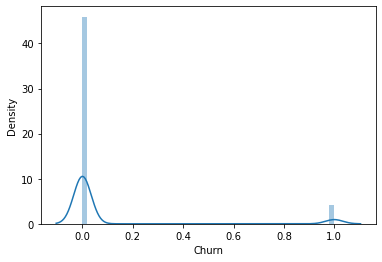

In [129]:
# Distribution of target variable

sns.distplot(data_HighValue2.Churn)
plt.show()

In [131]:
print("skewness: ", data_HighValue2.Churn.skew())
print("kurtosis: ", data_HighValue2.Churn.kurt())

skewness:  3.0626725385127465
kurtosis:  7.380455087655615


- we have only 8 percent of data marked as churn. for better prediction it advised to have a balanced distribution. 
- We will use SMOTE for the same.

## 6. Data imbalance Handling

In [60]:
sm = SMOTE(random_state=42)

X_res, y_res = sm.fit_resample(X, y)

print("X data shape: ",X_res.shape)
print("y data shape: ",y_res.shape)
y_res.value_counts(normalize=True)*100

X data shape:  (55120, 104)
y data shape:  (55120,)


1.0    50.0
0.0    50.0
Name: Churn, dtype: float64

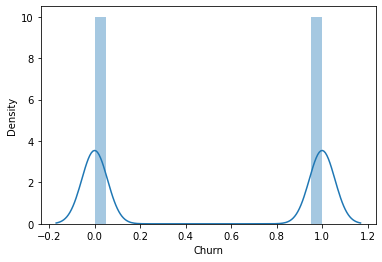

In [132]:
# Distribution of target variable

sns.distplot(y_res)
plt.show()

In [133]:
print("skewness (balanced data): ", y_res.skew())
print("kurtosis (balanced data): ", y_res.kurt())

skewness (balanced data):  0.0
kurtosis (balanced data):  -2.0000725728903967


## 7. preparing data for model

In [61]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X_res,y_res,test_size = 0.2, random_state = 42)
print("Train data shape: ",train_X.shape)
print("Test data shape: ",test_X.shape)


Train data shape:  (44096, 104)
Test data shape:  (11024, 104)


In [62]:
print("Train y distribution: \n",train_y.value_counts(normalize=True))

Train y distribution: 
 0.0    0.501519
1.0    0.498481
Name: Churn, dtype: float64


## 8. Standardize the data

In [63]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_X_sc = sc.fit_transform(train_X)
test_X_sc = sc.transform(test_X)

train_X_sc = pd.DataFrame(train_X_sc,columns = train_X.columns)
test_X_sc = pd.DataFrame(test_X_sc,columns = test_X.columns)

train_X_sc.head()

arpu_8  onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
0 -0.391775    -0.559400     -0.026041      -0.435360      -0.456305   
1  1.534761     0.091129      0.160060       3.437675       3.247970   
2 -0.994754    -0.553531     -0.717285       0.563524      -0.314586   
3 -1.025032    -0.565019     -0.719860      -0.435360      -0.456305   
4 -1.025032    -0.565019     -0.719860      -0.375607      -0.456305   

   loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
0         -0.513248         -0.557588         -0.409989         -0.374912   
1          0.076573         -0.125408          0.852380         -0.374912   
2         -0.535400         -0.617376         -0.409989         -0.374912   
3         -0.535400         -0.617376         -0.409989         -0.374912   
4         -0.535400         -0.617376         -0.409989         -0.374912   

   loc_og_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
0     -0.585350         -0.421896          0.525282         -0.262338   
1     -0.074003         -0.288683          0.198979          0.138622   
2     -0.631828         -0.421896         -0.462812         -0.262338   
3     -0.631828         -0.421896         -0.462812         -0.262338   
4     -0.631828         -0.421896         -0.462812         -0.262338   

   std_og_mou_8  isd_og_mou_8  spl_og_mou_8  og_others_8  total_og_mou_8  \
0     -0.015644     -0.231989     -0.508617          0.0       -0.304636   
1     -0.110274      4.946253     -0.508617          0.0       -0.129248   
2     -0.530185     -0.231989     -0.508617          0.0       -0.728390   
3     -0.530185     -0.231989     -0.508617          0.0       -0.728390   
4     -0.530185     -0.231989     -0.508617          0.0       -0.728390   

   loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  loc_ic_mou_8  \
0         -0.512557         -0.602644         -0.447250     -0.619451   
1         -0.042269         -0.148746          1.041714     -0.068939   
2         -0.594732         -0.673747         -0.447250     -0.689904   
3         -0.594732         -0.673747         -0.447250     -0.689904   
4         -0.594732         -0.673747         -0.447250     -0.689904   

   std_ic_t2t_mou_8  std_ic_t2m_mou_8  std_ic_t2f_mou_8  std_ic_mou_8  \
0         -0.437993          1.880157         -0.309757      0.969849   
1          2.981536          1.197741          1.614358      1.708222   
2         -0.437993         -0.494806         -0.309757     -0.527360   
3         -0.437993         -0.494806         -0.309757     -0.527360   
4         -0.437993         -0.494806         -0.309757     -0.527360   

   total_ic_mou_8  spl_ic_mou_8  isd_ic_mou_8  ic_others_8  total_rech_num_8  \
0       -0.397176     -0.222331     -0.312859    -0.313292         -0.674080   
1        0.455862     -0.222331      4.558073    -0.313292         -0.523509   
2       -0.726588     -0.222331     -0.312859    -0.313292         -0.824651   
3       -0.726588     -0.222331     -0.312859    -0.313292         -0.821970   
4       -0.726588     -0.222331     -0.312859    -0.313292         -0.691884   

   total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  total_rech_data_6  \
0         -0.981758       -1.015589           -0.732304          -1.053017   
1          1.553318        2.978253           -0.732304          -1.053017   
2         -0.981758       -1.015589           -0.732304          -1.053017   
3         -0.981758       -1.015589           -0.732304           1.023193   
4         -0.981758       -1.015589           -0.732304          -0.271632   

   total_rech_data_7  total_rech_data_8  max_rech_data_8  vol_2g_mb_8  \
0           1.087642          -0.780421        -0.560695    -0.369294   
1          -1.001294           1.340781        -0.269751    -0.369294   
2          -0.829268          -0.605738        -0.534652    -0.369294   
3           0.061770          -0.780421        -0.560695    -0.369294   
4          -0.215119

## 9. PCA

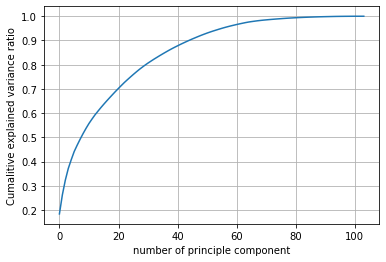

In [64]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
pca.fit_transform(train_X_sc)
cum_variance = np.cumsum(pca.explained_variance_ratio_)

## lets plot the variance aganist different number of principle component

plt.plot(cum_variance)
plt.xlabel("number of principle component")
plt.ylabel("Cumalitive explained variance ratio")
plt.grid()
plt.show()


In [65]:
cum_variance[70]

0.9850498679962685

In [66]:
## top 70 principal components explain 98.5% variance

pca = PCA(n_components=70, random_state=42)
train_X_sc_pca = pca.fit_transform(train_X_sc)
test_X_sc_pca = pca.transform(test_X_sc)


## 10. Model building (1) - churn prediction 
- Evaluate the models using appropriate evaluation metrics. Note that **it is more important to identify churners than the non-churners accurately** - So we need to make sure to reduce the prediction of actual churners as non churners. As churners coded as 1, we need to **consider recall score** here and to improve recall score, we can negotiate a little bit with precision score.

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [79]:
## function to generate model evaluation scores.
def Model_matrix(model_name,model, Stage ,train_X_sc_pca = train_X_sc_pca,test_X_sc_pca=test_X_sc_pca,train_y=train_y,test_y =test_y ):
    pred = model.predict(train_X_sc_pca)
    train_acc = accuracy_score(train_y, pred).round(2)
    train_conf = confusion_matrix(train_y, pred)
    train_precision_score = precision_score(train_y, pred).round(2)
    train_recall_score = recall_score(train_y, pred).round(2)
    train_f1_score = f1_score(train_y, pred).round(2)
    train_ROC = roc_auc_score(train_y, pred).round(2)

    test_pred = model.predict(test_X_sc_pca)
    test_acc = accuracy_score(test_y, test_pred).round(2)
    test_conf = confusion_matrix(test_y, test_pred)
    test_precision_score = precision_score(test_y, test_pred).round(2)
    test_recall_score = recall_score(test_y, test_pred).round(2)
    test_f1_score = f1_score(test_y, test_pred).round(2)
    test_ROC = roc_auc_score(test_y, test_pred).round(2)
    
    new_results = pd.DataFrame({'Method':[model_name],
                                'Hyperper_tuning': [Stage],
                            'Tr_accu':[train_acc],
                            'Tr_precision':[train_precision_score],
                            'Tr_Recall':[train_recall_score],
                            'Tr_f1Scr':[train_f1_score],
                            'Tr_ROC_AUC': [train_ROC],    
                            'Ts_accu':[test_acc],
                            'Ts_precision':[test_precision_score],
                            'Ts_Recall':[test_recall_score],
                            'Ts_f1Scr':[test_f1_score],
                            'Ts_ROC_AUC': [test_ROC]   })
    
    print(model_name,"\n---------------------------\n")
    print(f"TRAIN Confusion Matrix : \n{train_conf}")
    print()
    print(print(f"TEST Confusion Matrix : \n{test_conf}"))
    
#     results = pd.concat([results,new_results])
    return new_results


### 10.1 logistic regression

In [149]:
lr = LogisticRegression()
lr.fit(train_X_sc_pca, train_y)

new_results1 = Model_matrix("logistic Regression",lr, "No")
# results = pd.concat([results,new_results1])
new_results1

logistic Regression 
---------------------------

TRAIN Confusion Matrix : 
[[18437  3678]
 [ 3317 18664]]

TEST Confusion Matrix : 
[[4581  864]
 [ 818 4761]]
None


Method Hyperper_tuning  Tr_accu  Tr_precision  Tr_Recall  \
0  logistic Regression              No     0.84          0.84       0.85   

   Tr_f1Scr  Tr_ROC_AUC  Ts_accu  Ts_precision  Ts_Recall  Ts_f1Scr  \
0      0.84        0.84     0.85          0.85       0.85      0.85   

   Ts_ROC_AUC  
0        0.85

In [70]:
## Hyper parameter tuning
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 3, 5, 8, 10, 20,  100],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [50, 100, 1000, 2500]}

lr2 = LogisticRegression()   
lr2_rand_search = GridSearchCV(lr2, param_grid, scoring= 'recall', 
                          cv = 5, n_jobs = -1,verbose = True,return_train_score=True)
lr2_rand_search.fit(train_X_sc_pca, train_y)    
print("best estimator: ", lr2_rand_search.best_params_)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits
best estimator:  {'C': 0.001, 'max_iter': 50, 'penalty': 'l2', 'solver': 'liblinear'}


In [148]:
lr3 = LogisticRegression(penalty='l2', C=0.001, max_iter=50, solver='liblinear')
lr3.fit(train_X_sc_pca, train_y)    

new_results1 = Model_matrix("logistic Regression",lr3, "yes")
new_results1   

logistic Regression 
---------------------------

TRAIN Confusion Matrix : 
[[18343  3772]
 [ 3244 18737]]

TEST Confusion Matrix : 
[[4554  891]
 [ 790 4789]]
None


Method Hyperper_tuning  Tr_accu  Tr_precision  Tr_Recall  \
0  logistic Regression             yes     0.84          0.83       0.85   

   Tr_f1Scr  Tr_ROC_AUC  Ts_accu  Ts_precision  Ts_Recall  Ts_f1Scr  \
0      0.84        0.84     0.85          0.84       0.86      0.85   

   Ts_ROC_AUC  
0        0.85

### 10.2 KNN

In [147]:
knn = KNeighborsClassifier()
knn.fit(train_X_sc_pca, train_y)

new_results1 = Model_matrix("KNN",knn, "No")
new_results1

KNN 
---------------------------

TRAIN Confusion Matrix : 
[[18797  3318]
 [    7 21974]]

TEST Confusion Matrix : 
[[4357 1088]
 [   6 5573]]
None


Method Hyperper_tuning  Tr_accu  Tr_precision  Tr_Recall  Tr_f1Scr  \
0    KNN              No     0.92          0.87        1.0      0.93   

   Tr_ROC_AUC  Ts_accu  Ts_precision  Ts_Recall  Ts_f1Scr  Ts_ROC_AUC  
0        0.92      0.9          0.84        1.0      0.91         0.9

In [73]:
## Hyper parameter tuning
param_grid = { 'n_neighbors' : [2,3,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}


knn2 = KNeighborsClassifier()
knn2_rand_search = GridSearchCV(knn2, param_grid, scoring= 'recall', 
                          cv = 5, n_jobs = -1,verbose = True,return_train_score=True)
knn2_rand_search.fit(train_X_sc_pca, train_y)
print("best estimator: ", knn2_rand_search.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
best estimator:  {'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'distance'}


In [146]:
knn3 = KNeighborsClassifier(metric = 'manhattan', n_neighbors = 2,weights = 'distance'  )
knn3.fit(train_X_sc_pca, train_y)

new_results1 = Model_matrix("KNN",knn3, "Yes")
# results = pd.concat([results,new_results1])
new_results1

KNN 
---------------------------

TRAIN Confusion Matrix : 
[[22115     0]
 [    0 21981]]

TEST Confusion Matrix : 
[[4711  734]
 [   0 5579]]
None


Method Hyperper_tuning  Tr_accu  Tr_precision  Tr_Recall  Tr_f1Scr  \
0    KNN             Yes      1.0           1.0        1.0       1.0   

   Tr_ROC_AUC  Ts_accu  Ts_precision  Ts_Recall  Ts_f1Scr  Ts_ROC_AUC  
0         1.0     0.93          0.88        1.0      0.94        0.93

### 10.3 Random Forest Classifier

In [145]:
rd_clf = RandomForestClassifier()
rd_clf.fit(train_X_sc_pca, train_y)

new_results1 = Model_matrix("Random Forest",rd_clf, "No")
# results = pd.concat([results,new_results1])
new_results1

Random Forest 
---------------------------

TRAIN Confusion Matrix : 
[[22115     0]
 [    0 21981]]

TEST Confusion Matrix : 
[[5176  269]
 [ 208 5371]]
None


Method Hyperper_tuning  Tr_accu  Tr_precision  Tr_Recall  Tr_f1Scr  \
0  Random Forest              No      1.0           1.0        1.0       1.0   

   Tr_ROC_AUC  Ts_accu  Ts_precision  Ts_Recall  Ts_f1Scr  Ts_ROC_AUC  
0         1.0     0.96          0.95       0.96      0.96        0.96

In [76]:
## Hyper parameter tuning - Randomized
param_grid = {
   'max_depth': [8,12,18],
   'n_estimators': [100],
   'min_samples_leaf': [5,10,20],
   'min_samples_split': [10,20,30]
}

rd_clf_hyp = RandomForestClassifier()
rf_random_search = RandomizedSearchCV(rd_clf_hyp, param_grid, scoring= 'recall', 
                         cv = 5, n_jobs = -1,verbose = 1,return_train_score=True, n_iter=10)
rf_random_search.fit(train_X_sc_pca, train_y)
rf_random_search.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


{'n_estimators': 100,
 'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_depth': 18}

In [143]:
## Hyper parameter tuning
param_grid = {
   'max_depth': [15,18,20],
   'n_estimators': [100],
   'min_samples_leaf': [2,4,6,8,10,12],
   'min_samples_split': [12,15,18,20,22]
}

rd_clf_hyp = RandomForestClassifier()
rf_random_search = GridSearchCV(rd_clf_hyp, param_grid, scoring= 'recall', 
                         cv = 5, n_jobs = -1,verbose = 1,return_train_score=True)
rf_random_search.fit(train_X_sc_pca, train_y)
rf_random_search.best_params_

Fitting 5 folds for each of 90 candidates, totalling 450 fits


{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 12,
 'n_estimators': 100}

In [144]:
rd_clf2 = RandomForestClassifier(max_depth=20,min_samples_leaf=2,min_samples_split=12,n_estimators=100,random_state=42)
rd_clf2.fit(train_X_sc_pca, train_y)

new_results1 = Model_matrix("Random Forest",rd_clf2, "Yes")
# results = pd.concat([results,new_results1])
new_results1

Random Forest 
---------------------------

TRAIN Confusion Matrix : 
[[21172   943]
 [  110 21871]]

TEST Confusion Matrix : 
[[5087  358]
 [ 285 5294]]
None


Method Hyperper_tuning  Tr_accu  Tr_precision  Tr_Recall  Tr_f1Scr  \
0  Random Forest             Yes     0.98          0.96       0.99      0.98   

   Tr_ROC_AUC  Ts_accu  Ts_precision  Ts_Recall  Ts_f1Scr  Ts_ROC_AUC  
0        0.98     0.94          0.94       0.95      0.94        0.94

- Its reduced some overfitting

### 10.4 XgBoost Classifier

In [82]:
xgb = XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(train_X_sc_pca, train_y)

new_results1 = Model_matrix("XgBoost",xgb, "No")
# results = pd.concat([results,new_results1])
new_results1

XgBoost 
---------------------------

TRAIN Confusion Matrix : 
[[20741  1374]
 [  751 21230]]

TEST Confusion Matrix : 
[[4984  461]
 [ 328 5251]]
None


Method Hyperper_tuning  Tr_accu  Tr_precision  Tr_Recall  Tr_f1Scr  \
0  XgBoost              No     0.95          0.94       0.97      0.95   

   Tr_ROC_AUC  Ts_accu  Ts_precision  Ts_Recall  Ts_f1Scr  Ts_ROC_AUC  
0        0.95     0.93          0.92       0.94      0.93        0.93

In [83]:
# hyperparameter tuning
param_grid = {'learning_rate': [0.001,0.005, 0.1,0.2], 
            'subsample': [0.3,0.5,0.7,0.9],
             'max_depth': [2,5,7],
             'n_estimators':[200]}          
# specify model
xgb_hyp = XGBClassifier()
xgb_hyp_fit = GridSearchCV(xgb_hyp, param_grid, 
                       scoring= 'recall', 
                       cv = 5, 
                       n_jobs = -1,
                       verbose = 1,
                       return_train_score=True)      
xgb_hyp_fit.fit(train_X_sc_pca, train_y)
print(xgb_hyp_fit.best_estimator_)
xgb_hyp_fit.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=200,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)


{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.7}

In [84]:
xgb2 = XGBClassifier(learning_rate = 0.2, max_depth =7, n_estimators = 200, subsample= 0.7)
xgb2.fit(train_X_sc_pca, train_y)

new_results1 = Model_matrix("XgBoost",xgb2, "Yes")
# results = pd.concat([results,new_results1])
new_results1

XgBoost 
---------------------------

TRAIN Confusion Matrix : 
[[22105    10]
 [    1 21980]]

TEST Confusion Matrix : 
[[5147  298]
 [  69 5510]]
None


Method Hyperper_tuning  Tr_accu  Tr_precision  Tr_Recall  Tr_f1Scr  \
0  XgBoost             Yes      1.0           1.0        1.0       1.0   

   Tr_ROC_AUC  Ts_accu  Ts_precision  Ts_Recall  Ts_f1Scr  Ts_ROC_AUC  
0         1.0     0.97          0.95       0.99      0.97        0.97

In [85]:
COLUMN_NAMES=['Method','Hyperper_tuning'
              'Tr_Recall','Tr_ROC_AUC','Ts_Recall','Ts_ROC_AUC']
results = pd.DataFrame(columns=COLUMN_NAMES)

def Model_matrix_list(model_name,model, Stage ,train_X_sc_pca = train_X_sc_pca,test_X_sc_pca=test_X_sc_pca):
    pred = model.predict(train_X_sc_pca)
    train_recall_score = recall_score(train_y, pred).round(2)
    train_ROC = roc_auc_score(train_y, pred).round(2)

    test_pred = model.predict(test_X_sc_pca)
    test_recall_score = recall_score(test_y, test_pred).round(2)
    test_ROC = roc_auc_score(test_y, test_pred).round(2)
    
    new_results = pd.DataFrame({'Method':[model_name],
                                'Hyperper_tuning': [Stage],
                            'Tr_Recall':[train_recall_score],
                            'Tr_ROC_AUC': [train_ROC],    
                            'Ts_Recall':[test_recall_score],
                            'Ts_ROC_AUC': [test_ROC]   })
    
    return new_results


In [150]:
results = pd.DataFrame(columns=COLUMN_NAMES)

results = Model_matrix_list("logistic Regression",lr, "No")
results = pd.concat([results, Model_matrix_list("logistic Regression",lr3, "yes")])
results = pd.concat([results, Model_matrix_list("KNN",knn, "No")])
results = pd.concat([results, Model_matrix_list("KNN",knn3, "Yes")])
results = pd.concat([results, Model_matrix_list("Random Forest",rd_clf, "No")])
results = pd.concat([results, Model_matrix_list("Random Forest",rd_clf2, "Yes")])
results = pd.concat([results, Model_matrix_list("XgBoost",xgb, "No")])
results = pd.concat([results, Model_matrix_list("XgBoost",xgb2, "Yes")])


results

Method Hyperper_tuning  Tr_Recall  Tr_ROC_AUC  Ts_Recall  \
0  logistic Regression              No       0.85        0.84       0.85   
0  logistic Regression             yes       0.85        0.84       0.86   
0                  KNN              No       1.00        0.92       1.00   
0                  KNN             Yes       1.00        1.00       1.00   
0        Random Forest              No       1.00        1.00       0.96   
0        Random Forest             Yes       0.99        0.98       0.95   
0              XgBoost              No       0.97        0.95       0.94   
0              XgBoost             Yes       1.00        1.00       0.99   

   Ts_ROC_AUC  
0        0.85  
0        0.85  
0        0.90  
0        0.93  
0        0.96  
0        0.94  
0        0.93  
0        0.97

### Finalizing the model
- Considering our business problem which is to finding the possible churn customer and retain them, out of all the metrics (accuracy, precision, recall and so on), **we are keenly interested in recall** as we want to reduce the churn so it is somewhat expected to predict and give offers to possible non churn customers. So we are not giving high importance to precision score.
- Looking at abve table, **KNN and XgBoost** giving the best scores. KNN with hyperparameter tuning giving highest recall score (just 0.01 more than Xgboost) and XgBoost giving best auc_roc score (0.04 more than KNN) among all tried model.Lets compare the overall health and predicting power of these 2 models using ROC curve


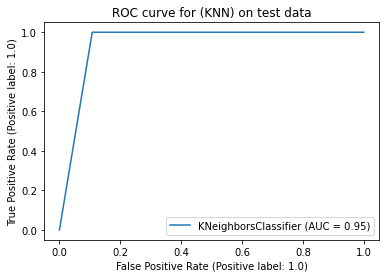

In [152]:
#plot ROC curve 
from sklearn.metrics import plot_roc_curve 

plot_roc_curve(knn3,  test_X_sc_pca, test_y, drop_intermediate = False)
plt.title("ROC curve for (KNN) on test data")
plt.show()

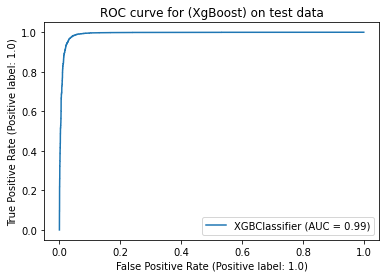

In [151]:
plot_roc_curve(xgb2, test_X_sc_pca, test_y, drop_intermediate = False)
plt.title("ROC curve for (XgBoost) on test data")
plt.show()

- looking at the difference in scores we **finalize** with **XgBoost with hyper parameter"** model. If business need some lighter model, we can opt for KNN as it is giving similar accurecy.

## 11. Model building (2) - finding most important features 

In [101]:
# Data preparetion without PCA.

train_X2, test_X2, train_y2, test_y2 = train_test_split(X,y, test_size=0.2, stratify = y, random_state=42)

sc2 = StandardScaler()
train_X2_sc = sc2.fit_transform(train_X2)
test_X2_sc = sc2.transform(test_X2)

train_X2_sc = pd.DataFrame(train_X2_sc,columns = train_X2.columns)
test_X2_sc = pd.DataFrame(test_X2_sc,columns = test_X2.columns)

print("train set shape: ", train_X2_sc.shape)
print("test set shape: ", test_X2_sc.shape)

train set shape:  (24000, 104)
test set shape:  (6001, 104)


##### We will use logistic regression, RFE and VIF algorithm to find most important features. We will start with 15 features and finalize the list removing variables with multicollinearity.

In [102]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [111]:
# Running RFE with the output number of the variable equal to 15
lr_rfe = LogisticRegression()
rfe = RFE(lr_rfe,n_features_to_select = 15)                    # selecting 15 top variables.
rfe_model1 = rfe.fit(train_X2_sc,train_y2)

list(zip(train_X2_sc.columns, rfe_model1.support_, rfe_model1.ranking_))


[('arpu_8', True, 1),
 ('onnet_mou_8', False, 18),
 ('offnet_mou_8', False, 79),
 ('roam_ic_mou_8', False, 72),
 ('roam_og_mou_8', False, 20),
 ('loc_og_t2t_mou_8', False, 36),
 ('loc_og_t2m_mou_8', True, 1),
 ('loc_og_t2f_mou_8', False, 60),
 ('loc_og_t2c_mou_8', False, 73),
 ('loc_og_mou_8', False, 17),
 ('std_og_t2t_mou_8', False, 37),
 ('std_og_t2m_mou_8', False, 19),
 ('std_og_t2f_mou_8', False, 7),
 ('std_og_mou_8', False, 16),
 ('isd_og_mou_8', False, 58),
 ('spl_og_mou_8', False, 51),
 ('og_others_8', False, 88),
 ('total_og_mou_8', True, 1),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('loc_ic_mou_8', True, 1),
 ('std_ic_t2t_mou_8', False, 69),
 ('std_ic_t2m_mou_8', False, 6),
 ('std_ic_t2f_mou_8', False, 28),
 ('std_ic_mou_8', False, 40),
 ('total_ic_mou_8', False, 39),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 86),
 ('ic_others_8', False, 41),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', False, 25),
 ('

In [117]:
#list of final features
final_col1 = train_X2_sc.columns[rfe_model1.support_]
final_col1

Index(['arpu_8', 'loc_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8',
       'total_rech_data_comb_8', 'total_rech_8', 'arpu_per_change',
       'total_ic_mou_per_change'],
      dtype='object')

In [118]:
train_y2_glm = list(train_y2)
train_X_sm = sm.add_constant(train_X2_sc[final_col1])
logm2 = sm.GLM(train_y2_glm,train_X_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                24000
Model:                            GLM   Df Residuals:                    23984
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4351.5
Date:                Wed, 26 Oct 2022   Deviance:                       8703.0
Time:                        12:13:10   Pearson chi2:                 2.34e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1826
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.1487      0.066    -62.937      0.000      -4.278      -4.019
arpu_8                      0.4962      0.081      6.106      0.000       0.337       0.655
loc_og_t2m_mou_8           -0.3520      0.080     -4.412      0.000      -0.508      -0.196
total_og_mou_8             -0.4208      0.055     -7.689      0.000      -0.528      -0.314
loc_ic_t2t_mou_8           -0.6860      0.118     -5.794      0.000      -0.918      -0.454
loc_ic_t2m_mou_8           -1.3471      0.182     -7.382      0.000      -1.705      -0.989
loc_ic_t2f_mou_8           -0.4508      0.073     -6.204      0.000      -0.593      -0.308
loc_ic_mou_8                0.7068      0.239      2.959      0.003       0.239       1.175
spl_ic_mou_8               -0.5814      0.073     -8.012      0.000      -0.724      -0.439
total_rech_num_8           -0.5755      0.052    -11.084      0.000      -0.677      -0.474
last_day_rch_amt_8         -0.6906      0.047    -14.775      0.000      -0.782      -0.599
max_rech_data_8            -0.5706      0.051    -11.219      0.000      -0.670      -0.471
total_rech_data_comb_8     -0.7578      0.121     -6.256      0.000      -0.995      -0.520
total_rech_8                0.4014      0.128      3.138      0.002       0.151       0.652
arpu_per_change            -0.4736      0.036    -13.053      0.000      -0.545      -0.402
total_ic_mou_per_change    -0.3570      0.035    -10.064      0.000      -0.426      -0.287
===========================================================================================
"""

In [119]:
def show_vif(train_X,final_col1):
    # Create a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = train_X[final_col1].columns
    vif['VIF'] = [variance_inflation_factor(train_X[final_col1].values, i) for i in range(train_X[final_col1].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

vif = show_vif(train_X2_sc,final_col1)
vif

Features    VIF
6              loc_ic_mou_8  21.19
12             total_rech_8  14.35
4          loc_ic_t2m_mou_8  12.87
11   total_rech_data_comb_8   9.81
0                    arpu_8   6.49
3          loc_ic_t2t_mou_8   4.19
2            total_og_mou_8   2.80
1          loc_og_t2m_mou_8   2.34
8          total_rech_num_8   2.02
13          arpu_per_change   1.72
10          max_rech_data_8   1.61
9        last_day_rch_amt_8   1.55
5          loc_ic_t2f_mou_8   1.54
14  total_ic_mou_per_change   1.24
7              spl_ic_mou_8   1.03

In [120]:
## remove variables with VIF > 4
final_col1 = final_col1.drop("loc_ic_mou_8",1)

In [115]:
## check again with lesser variables
train_X_sm = sm.add_constant(train_X2_sc[final_col1])
logm2 = sm.GLM(train_y2_glm,train_X_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                24000
Model:                            GLM   Df Residuals:                    23987
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4412.0
Date:                Wed, 26 Oct 2022   Deviance:                       8824.1
Time:                        12:12:27   Pearson chi2:                 1.21e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1784
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.0777      0.064    -63.565      0.000      -4.203      -3.952
arpu_8                      0.7018      0.056     12.474      0.000       0.592       0.812
loc_og_t2m_mou_8           -0.8085      0.076    -10.620      0.000      -0.958      -0.659
total_og_mou_8             -0.4167      0.055     -7.578      0.000      -0.524      -0.309
loc_ic_t2t_mou_8           -0.6259      0.068     -9.180      0.000      -0.760      -0.492
loc_ic_t2f_mou_8           -0.5432      0.069     -7.914      0.000      -0.678      -0.409
spl_ic_mou_8               -0.5913      0.073     -8.138      0.000      -0.734      -0.449
total_rech_num_8           -0.5854      0.050    -11.709      0.000      -0.683      -0.487
last_day_rch_amt_8         -0.6717      0.045    -14.844      0.000      -0.760      -0.583
max_rech_data_8            -0.5872      0.051    -11.526      0.000      -0.687      -0.487
total_rech_data_comb_8     -0.4527      0.070     -6.490      0.000      -0.589      -0.316
arpu_per_change            -0.4873      0.036    -13.518      0.000      -0.558      -0.417
total_ic_mou_per_change    -0.3630      0.034    -10.601      0.000      -0.430      -0.296
===========================================================================================
"""

In [121]:
vif = show_vif(train_X2_sc,final_col1)
vif

Features    VIF
11             total_rech_8  14.34
10   total_rech_data_comb_8   9.80
0                    arpu_8   6.49
2            total_og_mou_8   2.80
4          loc_ic_t2m_mou_8   2.36
1          loc_og_t2m_mou_8   2.33
7          total_rech_num_8   2.02
12          arpu_per_change   1.72
9           max_rech_data_8   1.61
8        last_day_rch_amt_8   1.55
3          loc_ic_t2t_mou_8   1.40
5          loc_ic_t2f_mou_8   1.27
13  total_ic_mou_per_change   1.24
6              spl_ic_mou_8   1.03

In [122]:
## remove variables with VIF > 4
final_col1 = final_col1.drop("total_rech_8",1)
final_col1 = final_col1.drop("total_rech_data_comb_8",1)

In [123]:
## check again with lesser variables
train_X_sm = sm.add_constant(train_X2_sc[final_col1])
logm2 = sm.GLM(train_y2_glm,train_X_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                24000
Model:                            GLM   Df Residuals:                    23987
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4386.3
Date:                Wed, 26 Oct 2022   Deviance:                       8772.7
Time:                        12:14:33   Pearson chi2:                 2.47e+05
No. Iterations:                     8   Pseudo R-squ. (CS):             0.1802
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -4.1090      0.065    -63.179      0.000      -4.236      -3.982
arpu_8                      0.6893      0.056     12.396      0.000       0.580       0.798
loc_og_t2m_mou_8           -0.3672      0.079     -4.620      0.000      -0.523      -0.211
total_og_mou_8             -0.3447      0.053     -6.445      0.000      -0.450      -0.240
loc_ic_t2t_mou_8           -0.4091      0.067     -6.137      0.000      -0.540      -0.278
loc_ic_t2m_mou_8           -0.8834      0.096     -9.165      0.000      -1.072      -0.694
loc_ic_t2f_mou_8           -0.3745      0.068     -5.518      0.000      -0.508      -0.241
spl_ic_mou_8               -0.5846      0.073     -8.034      0.000      -0.727      -0.442
total_rech_num_8           -0.6655      0.047    -14.049      0.000      -0.758      -0.573
last_day_rch_amt_8         -0.6567      0.045    -14.564      0.000      -0.745      -0.568
max_rech_data_8            -0.7242      0.048    -15.243      0.000      -0.817      -0.631
arpu_per_change            -0.5173      0.035    -14.588      0.000      -0.587      -0.448
total_ic_mou_per_change    -0.3637      0.036    -10.216      0.000      -0.434      -0.294
===========================================================================================
"""

In [124]:
vif = show_vif(train_X2_sc,final_col1)
vif

Features   VIF
0                    arpu_8  3.73
2            total_og_mou_8  2.60
4          loc_ic_t2m_mou_8  2.36
1          loc_og_t2m_mou_8  2.33
7          total_rech_num_8  1.70
10          arpu_per_change  1.69
8        last_day_rch_amt_8  1.48
3          loc_ic_t2t_mou_8  1.40
9           max_rech_data_8  1.40
5          loc_ic_t2f_mou_8  1.27
11  total_ic_mou_per_change  1.24
6              spl_ic_mou_8  1.03

##### All VIF score are less than 4, we can go with this list of vriables

In [125]:
#data prediction with final model
test_X2_lr = test_X2_sc[final_col1]
train_X2_lr = train_X2_sc[final_col1]
test_X2_lr.columns

Index(['arpu_8', 'loc_og_t2m_mou_8', 'total_og_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'max_rech_data_8',
       'arpu_per_change', 'total_ic_mou_per_change'],
      dtype='object')

In [126]:
## Hyperparameter tuning
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 20,  100]}

lr2_ref = LogisticRegression(class_weight='balanced')   
lr2_ref_rand_search = GridSearchCV(lr2_ref, param_grid, scoring= 'recall', 
                          cv = 5, n_jobs = -1,verbose = True,return_train_score=True)
lr2_ref_rand_search.fit(train_X2_lr, train_y2)    
print("best estimator: ", lr2_ref_rand_search.best_params_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
best estimator:  {'C': 0.01, 'penalty': 'l2'}


In [141]:
lr2_ref_mdl2 = LogisticRegression(random_state=42,C=0.01, penalty ='l2' , class_weight='balanced')
lr2_ref_mdl2.fit(train_X2_lr, train_y2)

new_results1 = Model_matrix("logistic Regression",lr2_ref_mdl2, "Yes",train_X2_lr,test_X2_lr,train_y2,test_y2 )
# results = pd.concat([results,new_results1])
new_results1

logistic Regression 
---------------------------

TRAIN Confusion Matrix : 
[[17911  4136]
 [  336  1617]]

TEST Confusion Matrix : 
[[4523  990]
 [  89  399]]
None


Method Hyperper_tuning  Tr_accu  Tr_precision  Tr_Recall  \
0  logistic Regression             Yes     0.81          0.28       0.83   

   Tr_f1Scr  Tr_ROC_AUC  Ts_accu  Ts_precision  Ts_Recall  Ts_f1Scr  \
0      0.42        0.82     0.82          0.29       0.82      0.43   

   Ts_ROC_AUC  
0        0.82

In [128]:
## with 82% test recall value we can check ahead the feature importance of the variables.
coef = []

for col in list(lr2_ref_mdl2.coef_):
    for i in col:
      coef.append(i)

coef_table = pd.DataFrame({'Variable':list(train_X2_lr.columns),
                          'Coefficient': coef})

coef_table = coef_table.sort_values(by='Coefficient',ascending= False, key=abs).reset_index(drop=True)
coef_table

Variable  Coefficient
0                    arpu_8     0.736836
1           max_rech_data_8    -0.607512
2          total_rech_num_8    -0.602663
3        last_day_rch_amt_8    -0.555543
4          loc_ic_t2m_mou_8    -0.525718
5           arpu_per_change    -0.517474
6          loc_og_t2m_mou_8    -0.469911
7              spl_ic_mou_8    -0.458690
8          loc_ic_t2t_mou_8    -0.356497
9   total_ic_mou_per_change    -0.353352
10         loc_ic_t2f_mou_8    -0.314784
11           total_og_mou_8    -0.279467

### Top 10 features are 
- 1. arpu_8: Average revenue per user for action phase (August month).
- 2. max_rech_data_8: Maximum data recharge in action phase.
- 3. total_rech_num_8: Number of recharge done in action phase.
- 4. last_day_rch_amt_8: Last recharge amount in action phase.
- 5. loc_ic_t2m_mou_8: local incoming Operator T to other operator mobile usage in action phase.
- 6. arpu_per_change: Changes in "average revenue per user" from good phase to action phase.
- 7. loc_og_t2m_mou_8: Local outgoing operator T to other operator mobile voice calls minutes of usage for action phase.   
- 8. spl_ic_mou_8: Special incoming calls in action phase.
- 9. loc_ic_t2t_mou_8: local incoming within same operator (mobile to mobile) usage in action phase.
- 10. total_ic_mou_per_change: Total incoming call usage
- 11. loc_ic_t2f_mou_8: local incoming Operator T to fixed lines of T usage in action phase.
- 12. total_og_mou_8: Total outgoing minutes of usage - voice calls for action phase.

## 12. Recommendation
 - We can see most of usage (mainly top 10 predictors) reduces in action phase for churn customer. few parameters like recharge amount, incoming calls, outgoing calls etc. company needs to give some offers to the customer.
 - If there is any decrease in arpu or vbc, company needs to check with customer on service satisfaction.
 - If customer is new (say less than 700). company needs to pay more attention on services for them.
 - Total recharge less than 500 in action phase, can be a sign of churn.so need to compare the trends and need to take actions.
 - while there is an increase in data recharge, need to provide some offers for social site usage or night pack to encourage more on data recharge.
 - Users who were recharging with high amounts were using the service for local uses less as compared to those who did lesser amounts of recharge.
 - Intuitevly people whose max recharge amount as well as local out going were very less even in the good phase churned more
 